<a href="https://colab.research.google.com/github/lefreakcestchic1971/coviditaly/blob/master/CovidItaly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('seaborn-white')
root = "/content/drive/My Drive/Colab Notebooks/"
datadir = root + "Dataset/"



Costruiamo e visualizziamo un subset del dataset pubblicato dalla Protezione Civile al seguente [link](https://github.com/pcm-dpc/COVID-19/tree/master/dati-regioni) ed aggiornato quotidianamente

In [96]:
covid = pd.read_csv(datadir + "20200331.csv", sep=",", parse_dates=True)
covid = covid.rename(columns={'data': 'date'})
covid = covid[['date', 'denominazione_regione', 'totale_positivi', 'nuovi_positivi', 'dimessi_guariti', 'deceduti', 'totale_casi', 'tamponi']]
covid

date denominazione_regione  ...  totale_casi  tamponi
0    2020-02-24T18:00:00               Abruzzo  ...            0        5
1    2020-02-24T18:00:00            Basilicata  ...            0        0
2    2020-02-24T18:00:00          P.A. Bolzano  ...            0        1
3    2020-02-24T18:00:00              Calabria  ...            0        1
4    2020-02-24T18:00:00              Campania  ...            0       10
..                   ...                   ...  ...          ...      ...
772  2020-03-31T17:00:00               Toscana  ...         4608    33165
773  2020-03-31T17:00:00           P.A. Trento  ...         1746     6973
774  2020-03-31T17:00:00                Umbria  ...         1078     8685
775  2020-03-31T17:00:00         Valle d'Aosta  ...          628     1582
776  2020-03-31T17:00:00                Veneto  ...         9155   106238

[777 rows x 8 columns]

Riorganizziamo il dataframe per esplicitare il numero di positivi e di deceduti per regione e per giorno, nonchè la percentuale di deceduti tra coloro che sono risultati positivi

In [97]:
italy_currently_positive = covid.pivot_table('totale_positivi', index='date', columns='denominazione_regione', aggfunc='sum', margins=True)
italy_currently_positive = italy_currently_positive.fillna(method='ffill')
italy_currently_positive = italy_currently_positive.fillna(0)
italy_currently_positive = italy_currently_positive.iloc[:-1] #remove last row (Italia). If i wanted to remove last column I should do iloc[:, :-1]
italy_currently_positive.rename({'All': 'Italia'}, axis=1, inplace=True)
italy_new_positive = covid.pivot_table('nuovi_positivi', index='date', columns='denominazione_regione', aggfunc='sum', margins=True)
italy_new_positive = italy_new_positive.fillna(method='ffill')
italy_new_positive = italy_new_positive.fillna(0)
italy_new_positive = italy_new_positive.iloc[:-1] #remove last row (Italia). If i wanted to remove last column I should do iloc[:, :-1]
italy_new_positive.rename({'All': 'Italia'}, axis=1, inplace=True)
italy_dead = covid.pivot_table('deceduti', index='date', columns='denominazione_regione', aggfunc='sum', margins=True)
italy_dead = italy_dead.fillna(method='ffill')
italy_dead = italy_dead.fillna(0)
italy_dead = italy_dead.iloc[:-1] 
italy_dead.rename({'All': 'Italia'}, axis=1, inplace=True)
italy_total_positive = covid.pivot_table('totale_casi', index='date', columns='denominazione_regione', aggfunc='sum', margins=True)
italy_total_positive = italy_total_positive.fillna(method='ffill')
italy_total_positive = italy_total_positive.fillna(0)
italy_total_positive = italy_total_positive.iloc[:-1] 
italy_total_positive.rename({'All': 'Italia'}, axis=1, inplace=True)
italy_tested = covid.pivot_table('tamponi', index='date', columns='denominazione_regione', aggfunc='sum', margins=True)
italy_tested = italy_tested.fillna(method='ffill')
italy_tested = italy_tested.fillna(0)
italy_tested = italy_tested.iloc[:-1] 
italy_tested.rename({'All': 'Italia'}, axis=1, inplace=True)
italy_dead_vs_total = italy_dead/italy_total_positive
italy_dead_vs_total = italy_dead_vs_total.fillna(0)
italy_currently_positive

denominazione_regione  Abruzzo  Basilicata  ...  Veneto  Italia
date                                        ...                
2020-02-24T18:00:00          0           0  ...      32     221
2020-02-25T18:00:00          0           0  ...      42     311
2020-02-26T18:00:00          0           0  ...      69     385
2020-02-27T18:00:00          1           0  ...     109     588
2020-02-28T18:00:00          1           0  ...     149     821
2020-02-29T17:00:00          2           0  ...     189    1049
2020-03-01T17:00:00          5           0  ...     261    1577
2020-03-02T18:00:00          5           0  ...     271    1835
2020-03-03T18:00:00          6           1  ...     297    2263
2020-03-04T17:00:00          7           1  ...     345    2706
2020-03-05T17:00:00          8           1  ...     380    3296
2020-03-06T17:00:00          9           3  ...     454    3916
2020-03-07T18:00:00         11           3  ...     505    5061
2020-03-08T18:00:00         17           4  ...     623    6387
2020-03-09T18:00:00         30           5  ...     694    7985
2020-03-10T18:00:00         37           7  ...     783    8514
2020-03-11T17:00:00         37           8  ...     940   10590
2020-03-12T17:00:00         78           8  ...    1297   12839
2020-03-13T17:00:00         83          10  ...    1453   14955
2020-03-14T17:00:00        106          10  ...    1775   17750
2020-03-15T17:00:00        128          11  ...    1989   20603
2020-03-16T17:00:00        165          12  ...    2274   23073
2020-03-17T17:00:00        216          20  ...    2488   26062
2020-03-18T17:00:00        249          27  ...    2953   28710
2020-03-19T17:00:00        366          37  ...    3169   33190
2020-03-20T17:00:00        422          52  ...    3677   37860
2020-03-21T17:00:00        494          66  ...    4214   42681
2020-03-22T17:00:00        539          81  ...    4644   46638
2020-03-23T17:00:00        605          89  ...    4986   50418
2020-03-24T17:00:00        622          91  ...    5351   54030
2020-03-25T17:00:00        738         112  ...    5745   57521
2020-03-26T17:00:00        860         133  ...    6140   62013
2020-03-27T17:00:00        925         147  ...    6648   66414
2020-03-28T17:00:00       1027         178  ...    6913   70065
2020-03-29T17:00:00       1169         197  ...    7251   73880
2020-03-30T17:00:00       1169         208  ...    7564   75528
2020-03-31T17:00:00       1191         216  ...    7850   77635

[37 rows x 22 columns]

Nella seguente grafica viene rappresentata la dinamica temporale degli attualmente positivi, quindi il totale dei positivi (compresi i nuovo positivi) meno i deceduti ed i guariti, regione per regione, evidenziando i deceduti con un colore più scuro

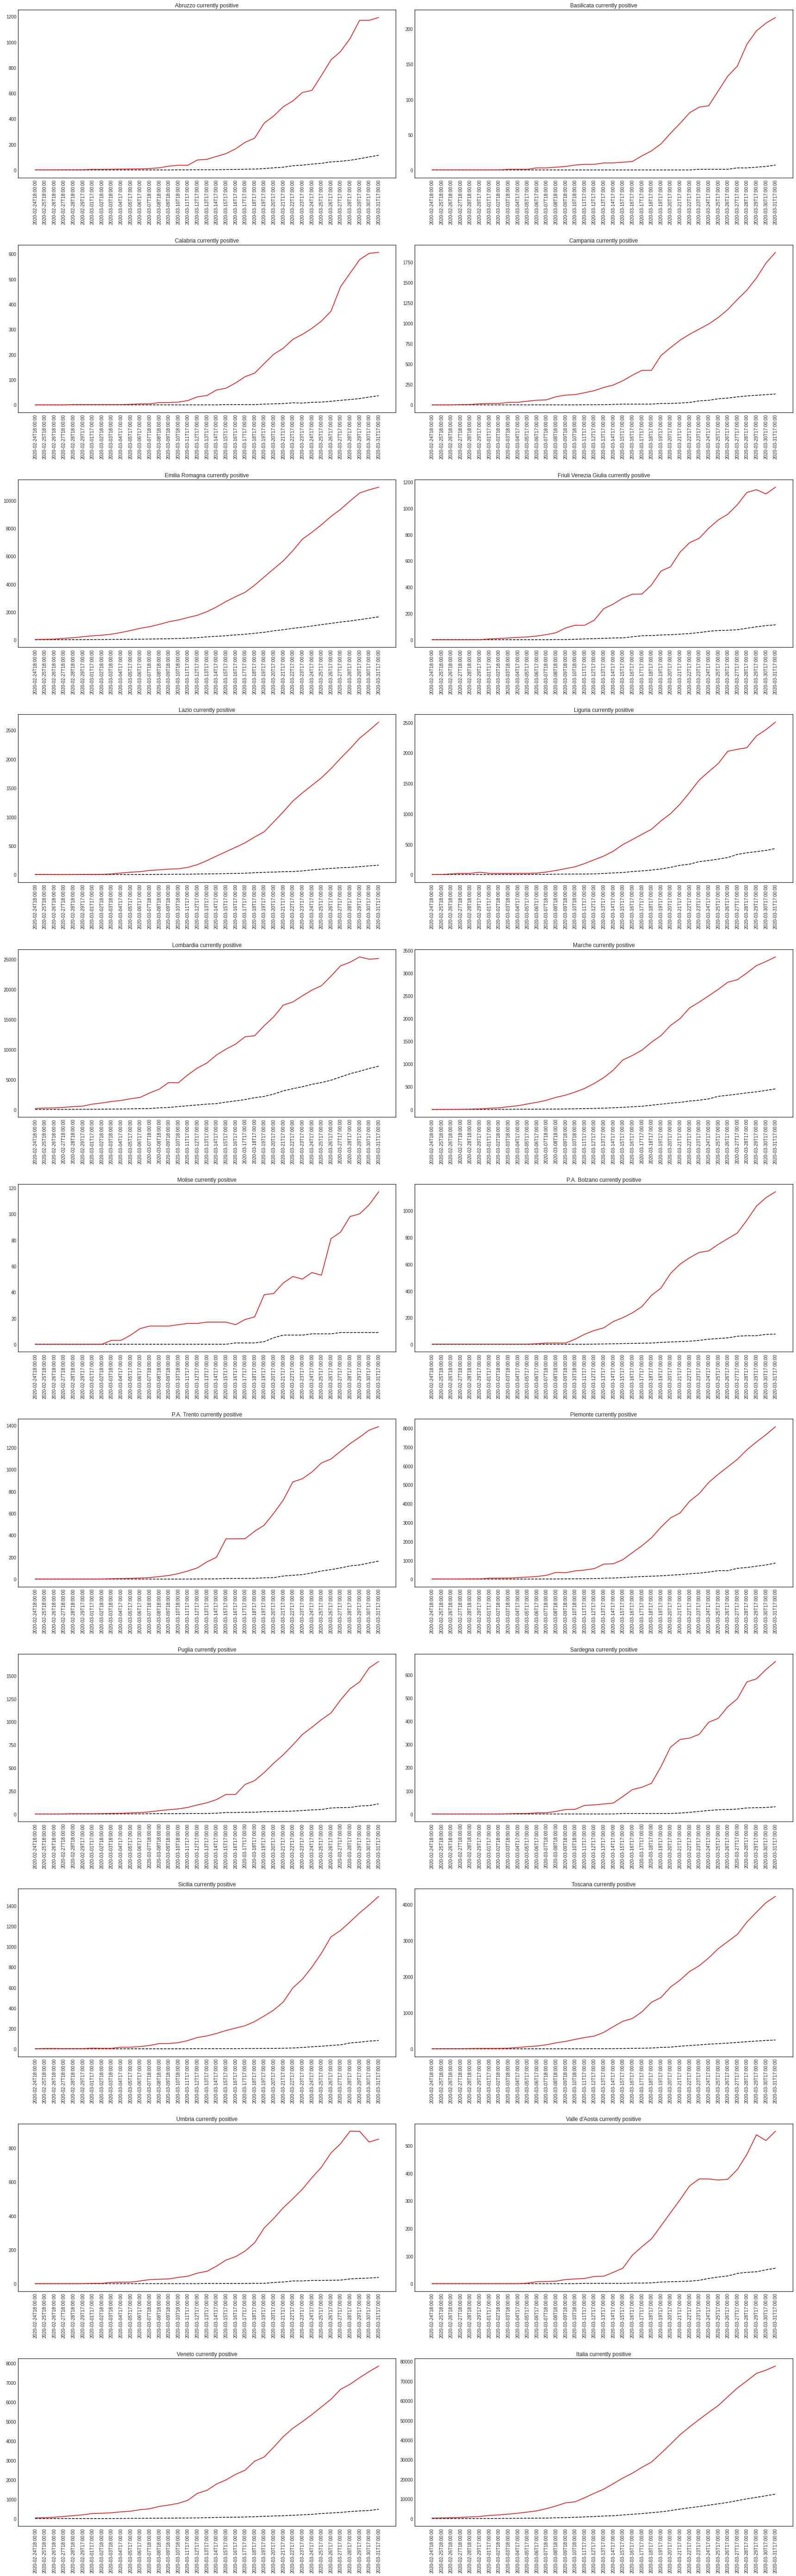

In [98]:
columns = list(italy_dead)
i=1
f = plt.figure(figsize=(30,100))
f.subplots_adjust(hspace=0.4, wspace=0.05)
for region in columns: 
    ax = f.add_subplot(11, 2, i)
    region_positive = italy_currently_positive[[region]]
    region_positive.columns = ['Positive']
    region_dead = italy_dead[[region]]
    region_dead.columns = ['Dead']
    ax.plot(region_dead.index, region_dead.Dead, '--k')
    ax.plot(region_positive.index, region_positive['Positive'], '-r')
    ax.set_title(region + ' currently positive')
    ax.set_xticklabels(region_positive.index,rotation=90)
    i=i+1


I grafici indicano un calo dei contagi in Lombradia, Friuli Venezia Giulia, Umbria e Valle d'Aosta che non consente ancora alla curva globale di smettere di crescere perchè ci sono regioni dove la crescita è ancora sostenuta ma è comunque un elemento di novità molto positivo che potrebbe preludere ad un calo a livello nazionale

Segue una comparazione tra regioni relativa al numero di attualmente positivi

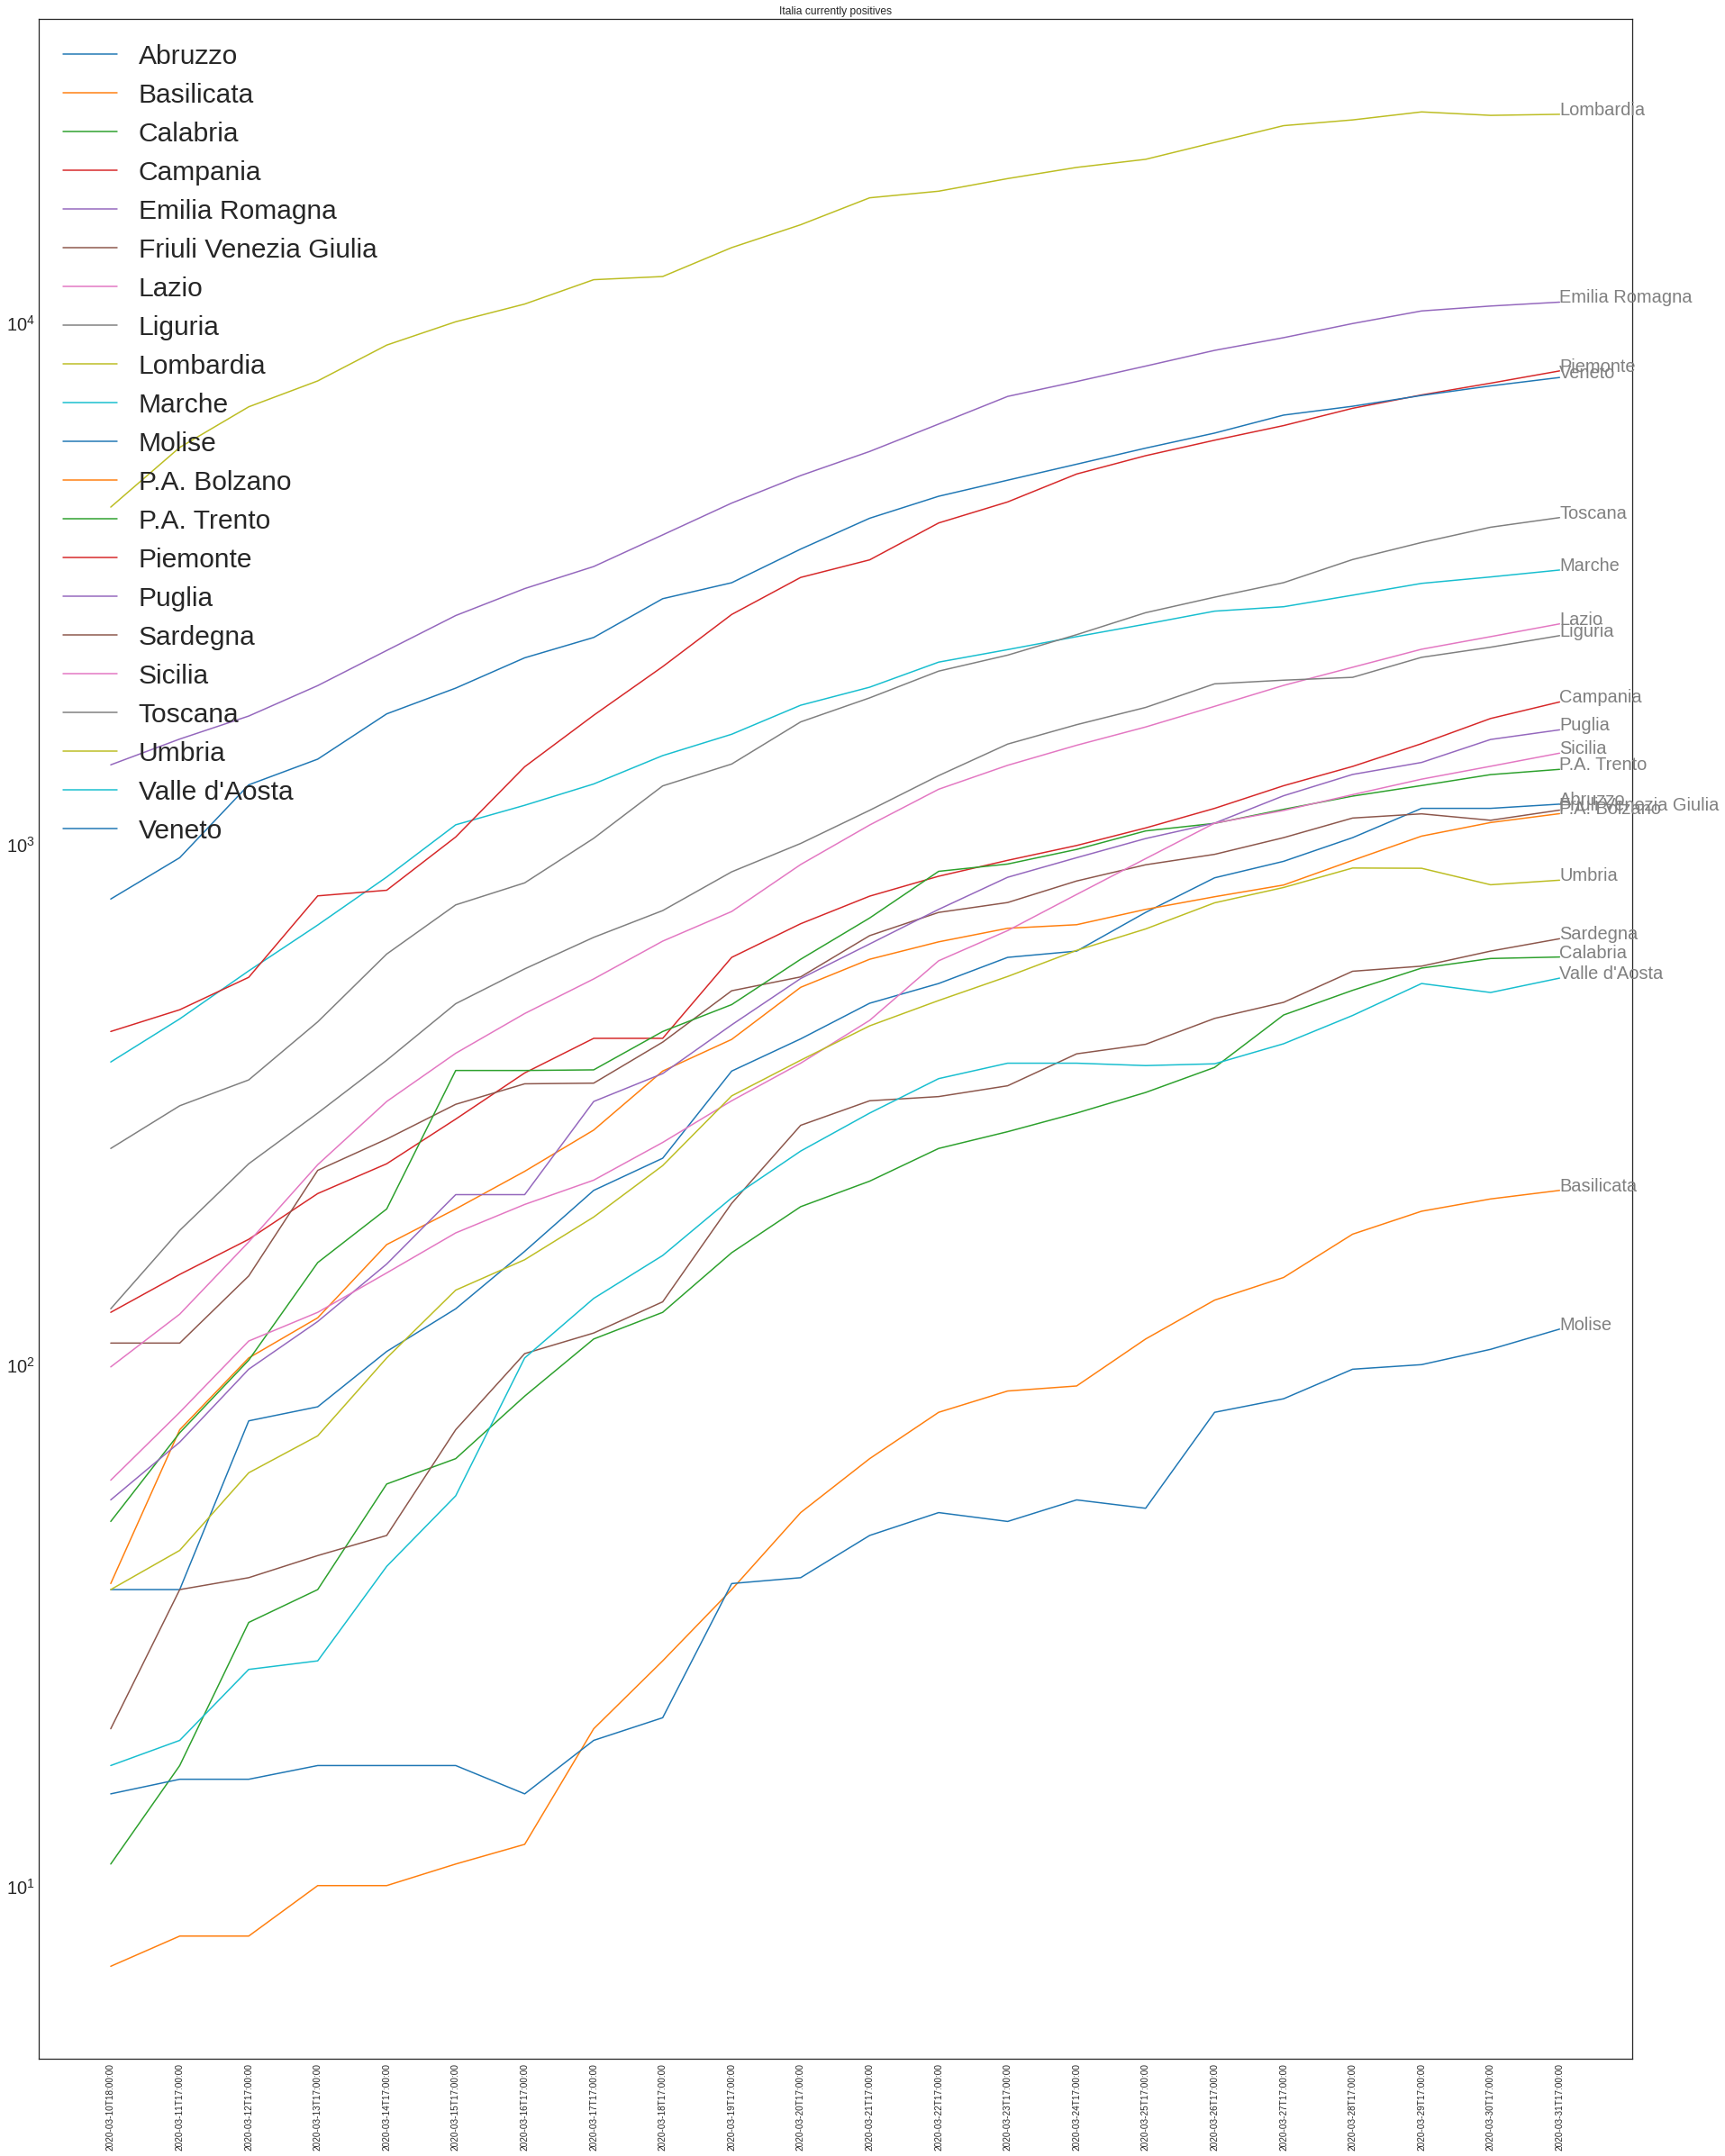

In [99]:
style = dict(size=20, color='gray')
columns = list(italy_dead)
last_day = covid['date'].max()
f = plt.figure(figsize=(65,100))
f.subplots_adjust(hspace=0.4, wspace=0.05)
ax = f.add_subplot(2, 2, 1)
i = 0
for region in columns: 
    if (region != 'Italia'):
        region_positive = italy_currently_positive[[region]]
        region_positive = region_positive[15:]
        region_positive.columns = ['Positive']
        ax.plot(region_positive.index, region_positive['Positive'], label=region)
        ax.text(21, region_positive.loc[last_day, 'Positive'], region, **style)
        i=i+1

ax.set_title(region + ' currently positives')
ax.set_xticklabels(region_positive.index,rotation=90)
ax.yaxis.set_tick_params(labelsize=20)
ax.set_yscale('log')
plt.legend(loc="upper left", prop={'size': 30})


Prosegue la stabilizzazione in Lombardia, nelle altre regioni che ieri avevano dato segni di stabilizzazione (Friuli, Umbria e Valle d'Aosta) è ripresa una leggera crescita. Per avere un'idea più chiara della dinamica è opportuno affidarsi, come di seguito, ad una più prudente media mobile a tre giorni.


Mentre la curva dei totali positivi (quindi comprensiva di guariti e deceduti) avrà un andamento sigmoidale, ossia tipo questo:


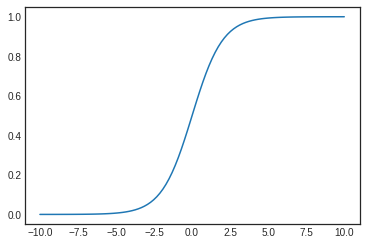

In [100]:
x = np.linspace(-10, 10, 100)
y = 1/(1 + np.exp(-x))
plt.plot(x, y)
plt.show()

... ci si aspetta che quella degli attualmente positivi raggiunga un picco per poi quindi scendere, magari con una discesa più lenta rispetto alla salita, ed infine tendere a zero: 

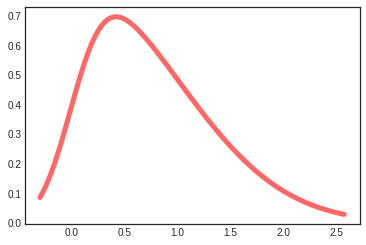

In [101]:
from scipy.stats import skewnorm
fig, ax = plt.subplots(1, 1)
a = 4
x = np.linspace(skewnorm.ppf(0.01, a), skewnorm.ppf(0.99, a), 100)
ax.plot(x, skewnorm.pdf(x, a), 'r-', lw=5, alpha=0.6, label='skewnorm pdf')

Vediamo allora l'andamento regione per regione di velocità (i nuovi contagi) ed accelerazione del numero dei positivi correnti (media mobile a tre giorni)

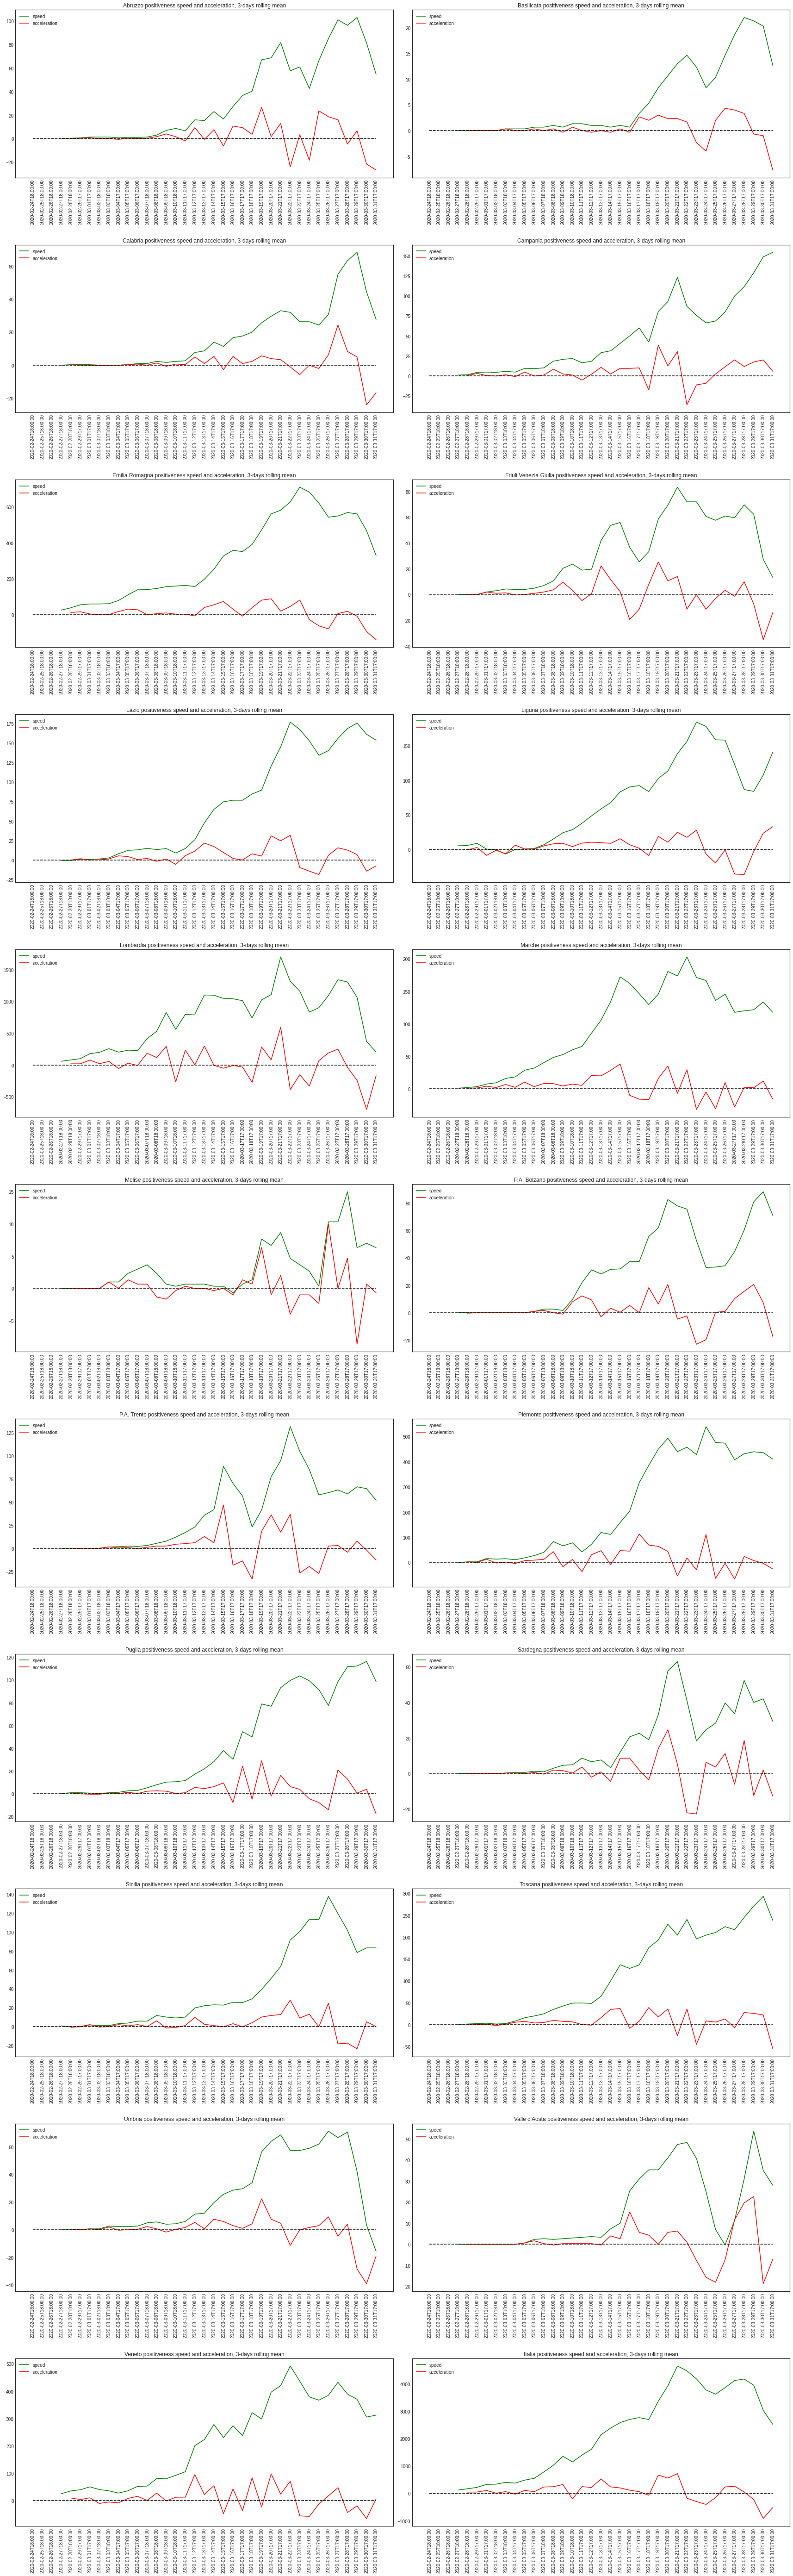

In [102]:
columns = list(italy_currently_positive)
i=1
f = plt.figure(figsize=(30,100))
f.subplots_adjust(hspace=0.4, wspace=0.05)
for region in columns: 
    ax = f.add_subplot(11, 2, i)
    region_positive = italy_currently_positive[[region]]
    region_positive.columns = ['Positive']
    ax.plot(region_positive.index, region_positive['Positive'].rolling(window=3).mean().diff(), '-g', label='speed')
    ax.set_title(region + ' currently positive delta')
    ax.set_xticklabels(region_positive.index,rotation=90)
    ax.plot(region_positive.index, region_positive['Positive'].rolling(window=3).mean().diff().diff(), '-r', label='acceleration')
    ax.plot(region_positive.index, np.zeros(region_positive.index.size), '--k')
    ax.set_title(region + ' positiveness speed and acceleration, 3-days rolling mean')
    ax.set_xticklabels(region_positive.index,rotation=90)
    ax.legend(loc='upper left', frameon=False)
    i=i+1


In [103]:
italy_currently_positive['Italia'].rolling(window=3).mean().diff()

date
2020-02-24T18:00:00            NaN
2020-02-25T18:00:00            NaN
2020-02-26T18:00:00            NaN
2020-02-27T18:00:00     122.333333
2020-02-28T18:00:00     170.000000
2020-02-29T17:00:00     221.333333
2020-03-01T17:00:00     329.666667
2020-03-02T18:00:00     338.000000
2020-03-03T18:00:00     404.666667
2020-03-04T17:00:00     376.333333
2020-03-05T17:00:00     487.000000
2020-03-06T17:00:00     551.000000
2020-03-07T18:00:00     785.000000
2020-03-08T18:00:00    1030.333333
2020-03-09T18:00:00    1356.333333
2020-03-10T18:00:00    1151.000000
2020-03-11T17:00:00    1401.000000
2020-03-12T17:00:00    1618.000000
2020-03-13T17:00:00    2147.000000
2020-03-14T17:00:00    2386.666667
2020-03-15T17:00:00    2588.000000
2020-03-16T17:00:00    2706.000000
2020-03-17T17:00:00    2770.666667
2020-03-18T17:00:00    2702.333333
2020-03-19T17:00:00    3372.333333
2020-03-20T17:00:00    3932.666667
2020-03-21T17:00:00    4657.000000
2020-03-22T17:00:00    4482.666667
2020-03-23T17:0

Ciò che interessa maggiormente ai fini predittivi è la data e l'intensità del picco degli attualmente positivi. Se fosse possibile stimare queste due quantità il Sistema Sanitario Regionale potrebbe organizzarsi.


prosegue la decelarazione in Abruzzo (picco entro 3 gg?), Basilicata (3gg), Calabria (2gg), Emilia Romagna (3gg), Friuli V.G (1gg, previsioni confermate), Lombardia (1gg, previsioni confermate), Umbria (picco raggiunto, previsioni confermate), Valle d'Aosta (3/4 gg) ed in generale Italia (5 gg, ossia 5 aprile). Iniziata la frenata in Toscana, Puglia, Piemonte, Sardegna, Marche, Lazio. Imminente in Campania (1gg)

Inaspettata (tantopiù in regime di lockdown) impennata in Liguria.

**Il picco si configura nel momento in cui la velocità toccherà lo zero senza più aumentare**.

Grazie al lockdown il picco effettivo dovrebbe essere più basso e più lontano nel tempo rispetto a quello previsto, secondo quanto descritto in questo [studio](https://www.visualcapitalist.com/infection-trajectory-flattening-the-covid19-curve/?fbclid=IwAR3KsS0FJgZPdCwoj0uw7qNO5bagm59eKdg85C12Wjw3T0w8mODXaX9iU8g)

Segue una comparazione tra regioni relativa al numero di deceduti

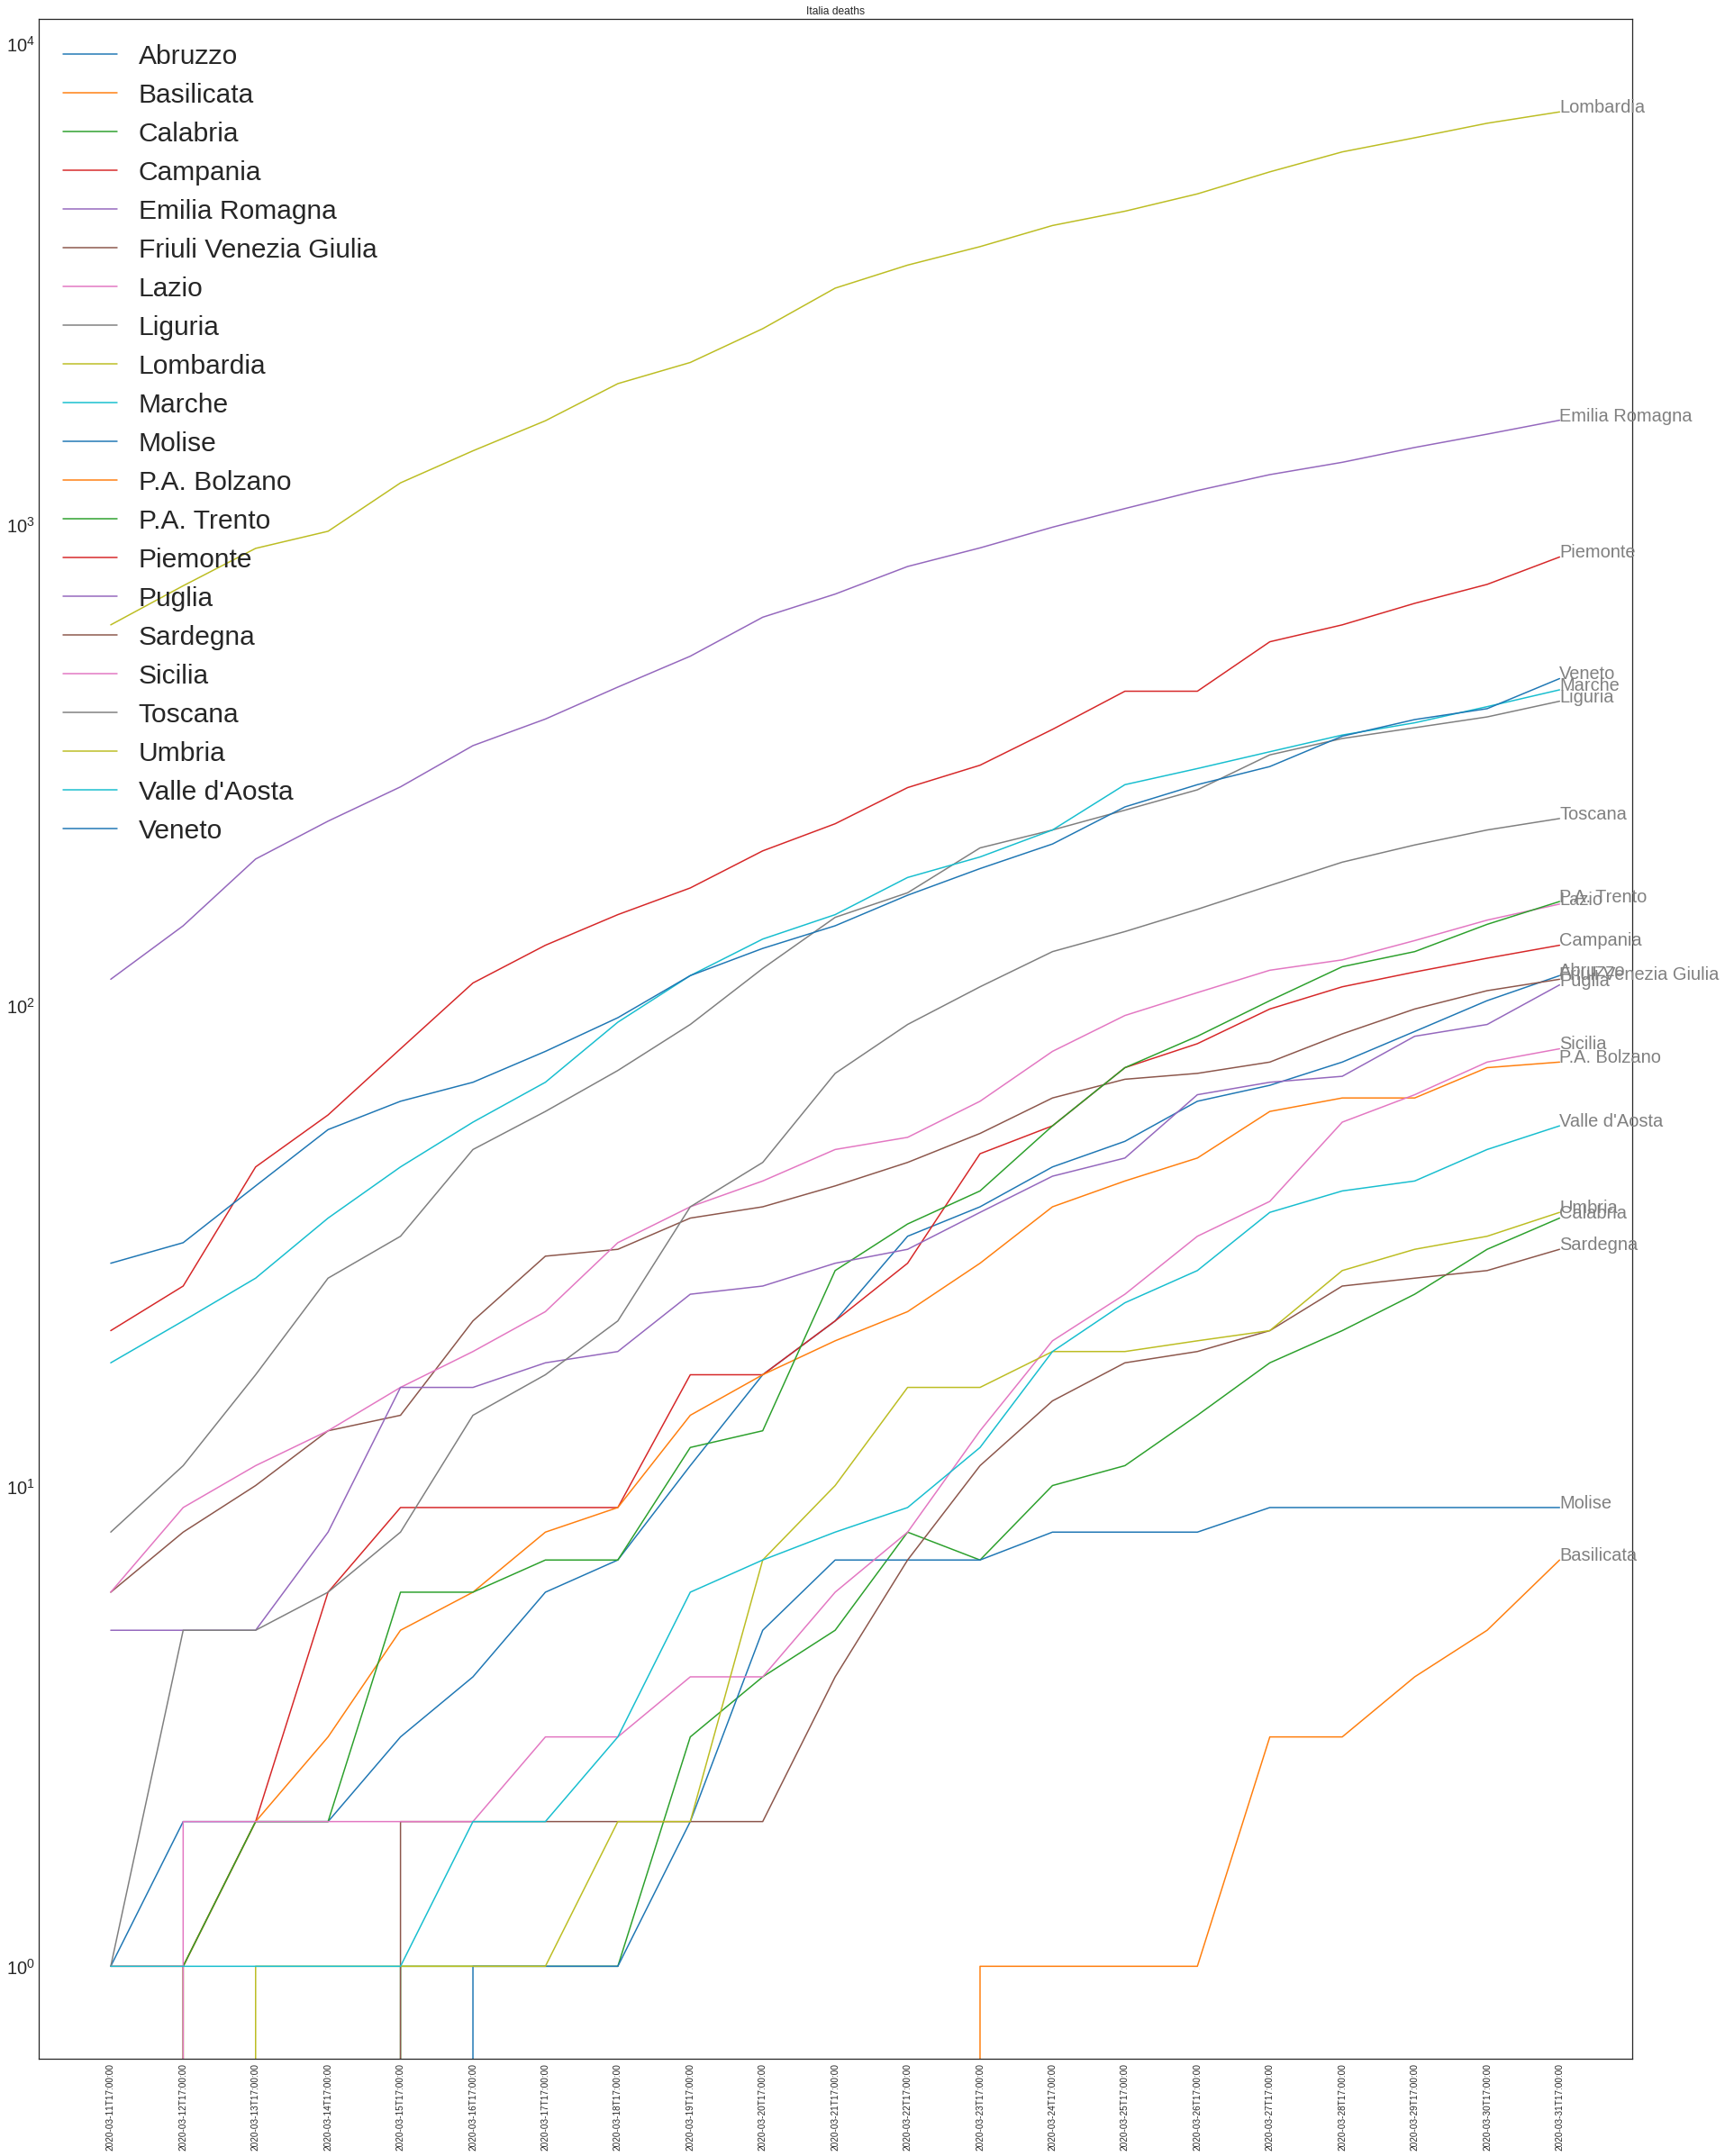

In [104]:
style = dict(size=20, color='gray')
columns = list(italy_dead)
last_day = covid['date'].max()
f = plt.figure(figsize=(65,100))
f.subplots_adjust(hspace=0.4, wspace=0.05)
ax = f.add_subplot(2, 2, 1)
i = 0
for region in columns: 
    if (region != 'Italia'):
        region_dead = italy_dead[[region]]
        region_dead = region_dead[16:]
        region_dead.columns = ['Dead']
        ax.plot(region_dead.index, region_dead['Dead'], label=region)
        ax.text(20, region_dead.loc[last_day, 'Dead'], region, **style)
        i=i+1

ax.set_title(region + ' deaths')
ax.set_xticklabels(region_dead.index,rotation=90)
ax.yaxis.set_tick_params(labelsize=20)
ax.set_yscale('log')
plt.legend(loc="upper left", prop={'size': 30})


Le curve dei deceduti sono ancora in salita ed è comprensibile, dal momento che si riferiscono a contagi risalenti almeno ad una settimana fa.



Nella seguente grafica viene rappresentata l'istantanea del rapporto tra deceduti e totali positivi su tutte le regioni, giorno per giorno, con media mobile a 3 giorni


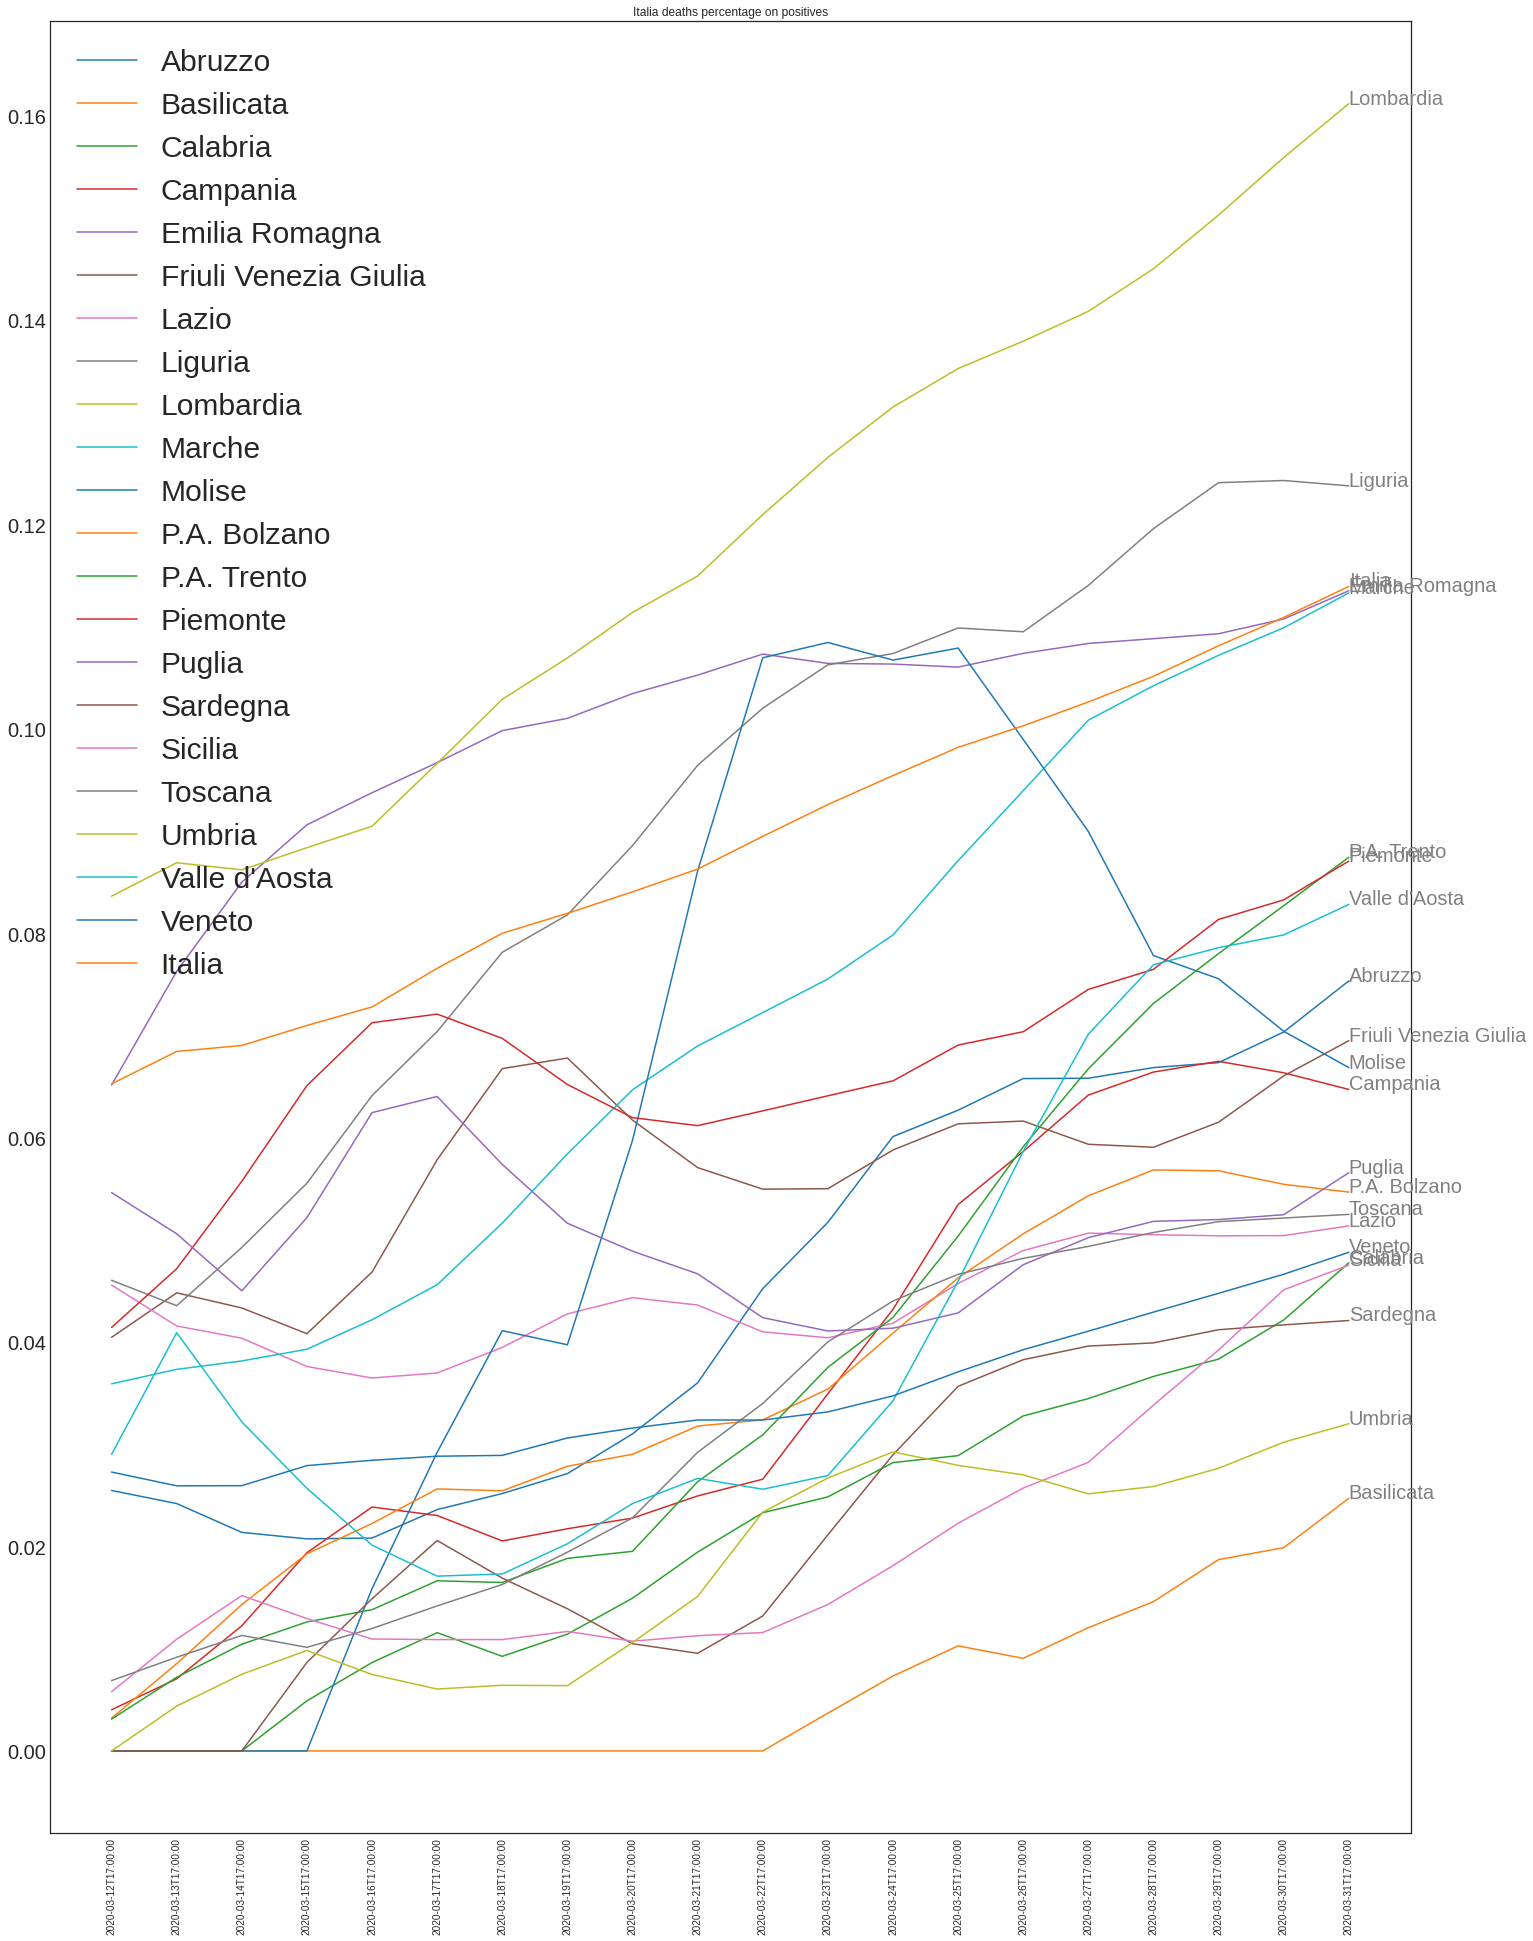

In [105]:
italy_dead_vs_total = italy_dead/italy_total_positive
style = dict(size=20, color='gray')
columns = list(italy_dead_vs_total)
last_day = covid['date'].max()
f = plt.figure(figsize=(50,80))
f.subplots_adjust(hspace=0.4, wspace=0.05)
ax = f.add_subplot(2, 2, 1)
i = 0
for region in columns: 
    region_dead = italy_dead_vs_total[[region]]
    region_dead = region_dead[15:]
    region_dead.columns = ['Dead_percentage']
    ax.plot(region_dead.index, region_dead['Dead_percentage'].rolling(window=3).mean(), label=region)
    ax.text(21, region_dead.rolling(window=3).mean().loc[last_day, 'Dead_percentage'], region, **style)
    i=i+1

ax.set_title(region + ' deaths percentage on positives')
ax.set_xticklabels(region_dead.index,rotation=90)
ax.yaxis.set_tick_params(labelsize=20)
ax.set_yscale('linear')
plt.legend(loc="upper left", prop={'size': 30})


E' la Lombardia a soffrire il più alto tasso di deceduti rispetto ai positivi, seguita a poca distanza dalla Liguria, quindi da Emilia Romagna e Marche che rappresentano la media nazionale. 


Il fenomeno è particolarmente in ascesa nella provincia di Trento, nelle Marche, in Sicilia e Lombardia.



Cerchiamo di capire se c'è una correlazione tra densità abitativa e numero di contagiati totale in base all'ultima rilevazione

In [0]:
#source: https://www.tuttitalia.it/regioni/
population_density = pd.DataFrame([
              {'denominazione_regione': 'Abruzzo', 'density': 121, 'population': 1311580}, 
              {'denominazione_regione': 'Basilicata', 'density': 56, 'population': 562869}, 
              {'denominazione_regione': 'Calabria', 'density': 128, 'population': 1947131}, 
              {'denominazione_regione': 'Campania', 'density': 424, 'population': 5801692}, 
              {'denominazione_regione': 'Emilia Romagna', 'density': 199, 'population': 4459477}, 
              {'denominazione_regione': 'Friuli Venezia Giulia', 'density': 153, 'population': 1215220}, 
              {'denominazione_regione': 'Lazio', 'density': 341, 'population': 5879082}, 
              {'denominazione_regione': 'Liguria', 'density': 286, 'population': 1550640}, 
              {'denominazione_regione': 'Lombardia', 'density': 422, 'population': 10060574}, 
              {'denominazione_regione': 'Marche', 'density': 162, 'population': 1525271}, 
              {'denominazione_regione': 'Molise', 'density': 69, 'population': 305617}, 
              {'denominazione_regione': 'P.A. Bolzano', 'density': 79, 'population': 536137}, 
              {'denominazione_regione': 'P.A. Trento', 'density': 79, 'population': 536137}, 
              {'denominazione_regione': 'Piemonte', 'density': 172, 'population': 4356406}, 
              {'denominazione_regione': 'Puglia', 'density': 206, 'population': 4029053}, 
              {'denominazione_regione': 'Sardegna', 'density': 68, 'population': 1639591}, 
              {'denominazione_regione': 'Sicilia', 'density': 194, 'population': 4999891}, 
              {'denominazione_regione': 'Toscana', 'density': 162, 'population': 3729641}, 
              {'denominazione_regione': 'Umbria', 'density': 104, 'population': 882015}, 
              {'denominazione_regione': 'Valle d\'Aosta', 'density': 39, 'population': 125666}, 
              {'denominazione_regione': 'Veneto', 'density': 267, 'population': 4905854}, 
            ]) 


In [0]:
last_day = covid['date'].max()
italy_total_positive_last_day = italy_total_positive[italy_total_positive.index == last_day]
italy_total_positive_last_day_flat = italy_total_positive_last_day.stack().reset_index(name='positive')[['denominazione_regione', 'positive']]
mergedf = pd.merge(italy_total_positive_last_day_flat, population_density)

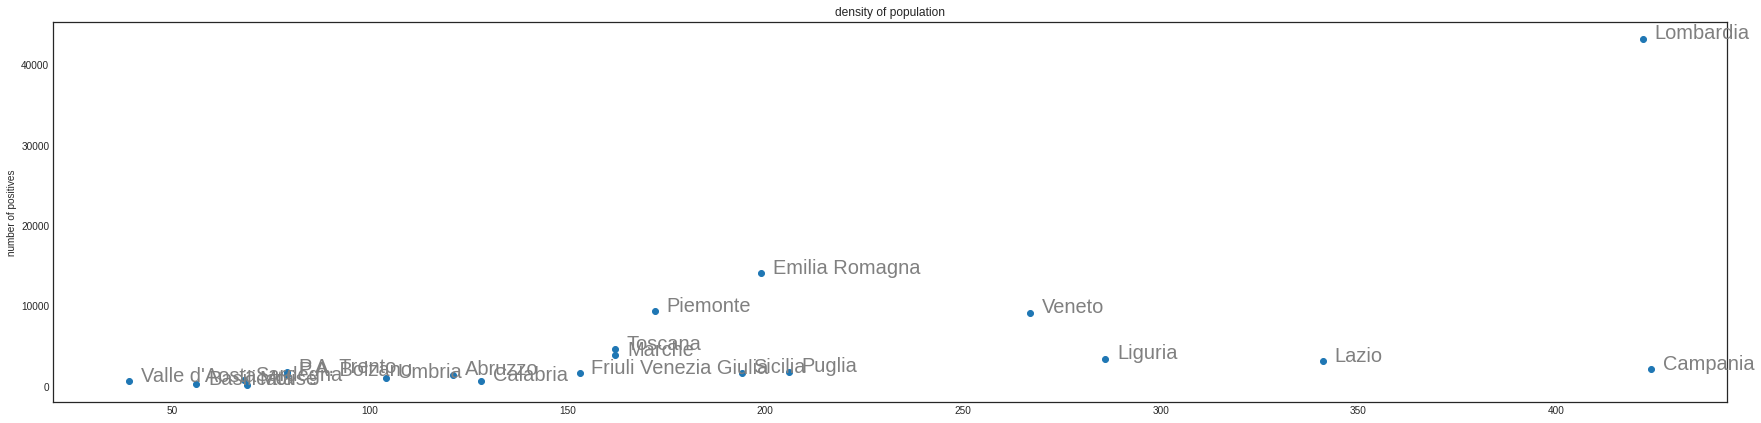

In [108]:
fig, ax = plt.subplots(figsize=(30, 7))
plt.scatter(mergedf['density'], mergedf['positive'])
style = dict(size=20, color='gray')
for i in range(21):
    ax.text(mergedf.loc[i, 'density']+3, mergedf.loc[i, 'positive'], mergedf.loc[i, 'denominazione_regione'], **style)
ax.set(title='density of population', ylabel='number of positives')
plt.show()


Questo plot non fornisce grossi spunti a prima vista. Di sicuro basse densità abitative sembrano essere correlate a basse percentuali di positività. Meno chiaro è ciò che avviene a densità medie ed alte dove si vedono risultati discordanti. Bisogna però tenere conto che in quest'area le regioni a basso numero di positivi sono, a parte la Liguria, regioni del centro-sud dove l'epidemia è arrivata in ritardo rispetto al nord, il che se da una parte può preludere ad una salita, dall'altra sconta il lockdown già nelle fasi iniziali

**Adesso si ripropongono più o meno le stesse analisi ma con i dati normalizzati in base alla popolazione**

In [0]:
tempdf = pd.DataFrame([{'denominazione_regione': 'Italia', 'population': population_density['population'].sum()}])
population = population_density[['denominazione_regione', 'population']]
population = population.append(tempdf, ignore_index = True)
population_pivot = population.pivot_table('population', columns='denominazione_regione')

Normalizziamo i dati sul numero di positivi in base alla popolazione di ciascuna regione, ottenendo quindi la percentuale di abitanti positivi di ogni regione

In [0]:
italy_total_positive_normalized = italy_total_positive.copy()
columns = list(italy_total_positive_normalized)
for regione in columns: 
    italy_total_positive_normalized[regione] = italy_total_positive[regione]/population_pivot.loc['population', regione]


Visualizziamo quindi la percentuale di positivi (dato lordo, quindi comprensivo di deceduti e guariti) di tutte le regioni sul totale delle loro popolazioni, giorno per giorno

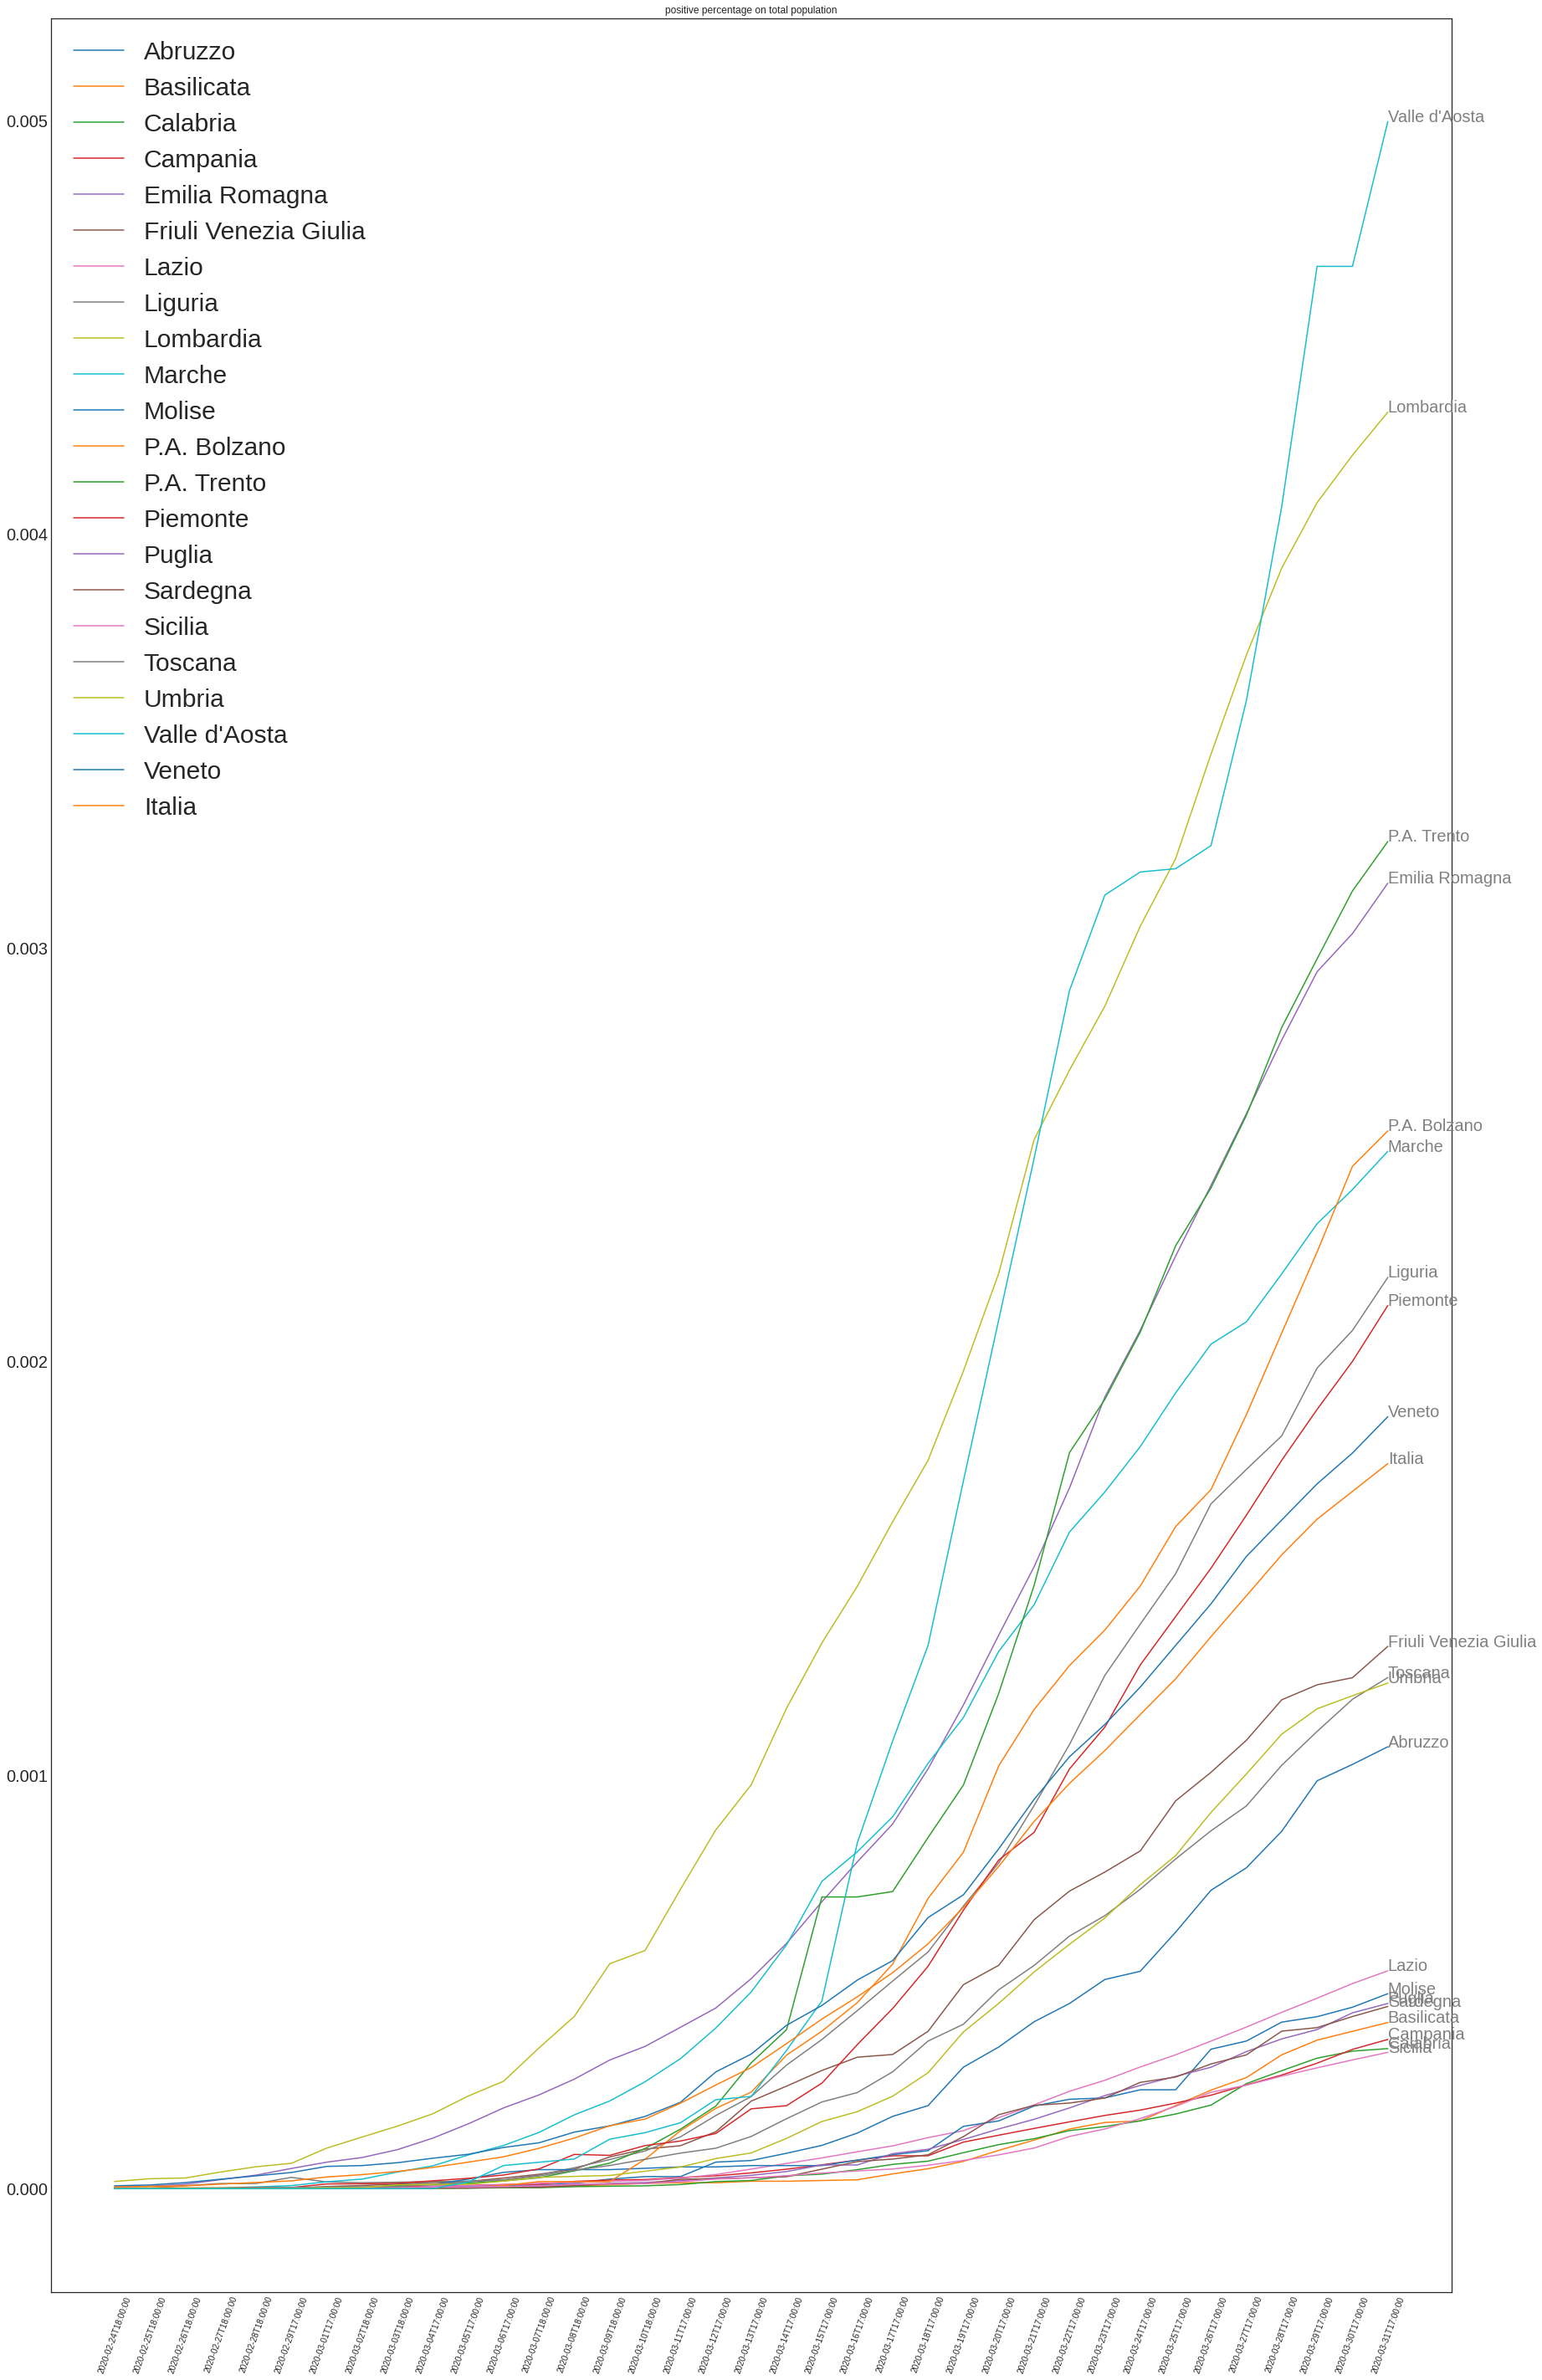

In [111]:
style = dict(size=20, color='gray')
columns = list(italy_total_positive_normalized)
last_day = covid['date'].max()
f = plt.figure(figsize=(30,50))
ax = f.add_subplot(1, 1, 1)
for region in columns: 
    region_tpn = italy_total_positive_normalized[[region]]
    region_tpn.columns = ['Positive_percentage']
    ax.plot(region_tpn.index, region_tpn['Positive_percentage'], label=region)
    ax.text(36, region_tpn.loc[last_day, 'Positive_percentage'], region, **style)

ax.set_title('positive percentage on total population')
ax.set_xticklabels(italy_total_positive_normalized.index,rotation=70)
ax.yaxis.set_tick_params(labelsize=20)
ax.set_yscale('linear')
plt.legend(loc="upper left", prop={'size': 30})




Sopra la media nazionale Valle d'Aosta, Lombardia, Emilia Romagna, Trentino Alto Adige e Marche. Al 28/3 la Valle d'Aosta e Lombardia superano il tasso di positività del 4 per mille. Al 30/3 Provincia di Trento ed Emilia Romagna superano il 3 per mille.
Si precisa che queste curve non possono decrescere ma solo saturare e solo Valle d'Aosta e Friuli Venezia Giulia stanno provando a farlo.

Infine la correlazione tra densità abitativa e percentuale di positivi totali riferita all'ultima rilevazione

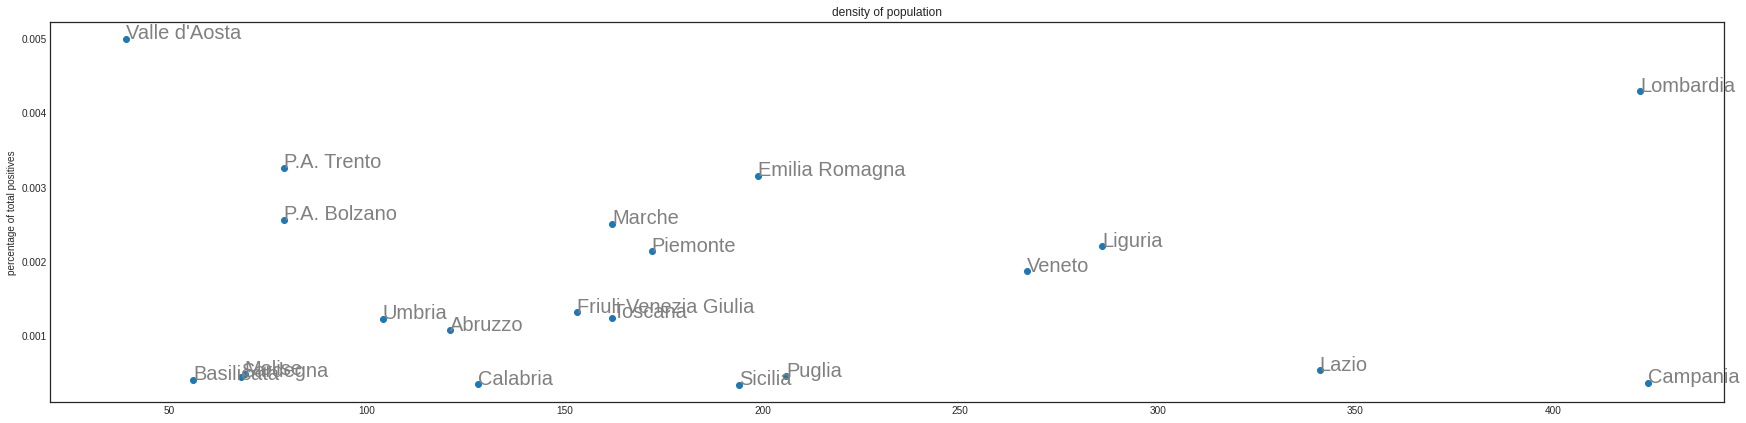

In [112]:
last_day = italy_total_positive_normalized.index[-1]
for day in italy_total_positive_normalized.index: 
    italy_total_positive_normalized_last_day = italy_total_positive_normalized[italy_total_positive_normalized.index == last_day]
italy_total_positive_normalized_last_day_flat = italy_total_positive_normalized_last_day.stack().reset_index(name='positive')[['denominazione_regione', 'positive']]
mergedf = pd.merge(italy_total_positive_normalized_last_day_flat, population_density)
fig, ax = plt.subplots(figsize=(30, 7))
plt.scatter(mergedf['density'], mergedf['positive'])
style = dict(size=20, color='gray')
for i in range(21):
    ax.text(mergedf.loc[i, 'density'], mergedf.loc[i, 'positive'], mergedf.loc[i, 'denominazione_regione'], **style)
ax.set(title='density of population', ylabel='percentage of total positives')
plt.show()


Questo plot non chiarisce nulla sull'eventuale correlazione tra le due grandezze ma sconta la differente maturità dell'epidemia da regione a regione, sul fondo infatti si trovano tutte le regioni del centro-sud che ad occhio hanno un ritardo di circa una settimana rispetto alle regioni del nord e che pertanto beneficiano maggiormente delle misure di prevenzione adottate in corso d\'opera.

Un altro spunto interessante potrebbe provenire dal rapporto tra numero di attualmente positivi e numero di tamponi effettuati, in quanto un numero o un incremento anomalo del numero di positivi in una regione può essere dovuto ad un aumento dei test eseguiti

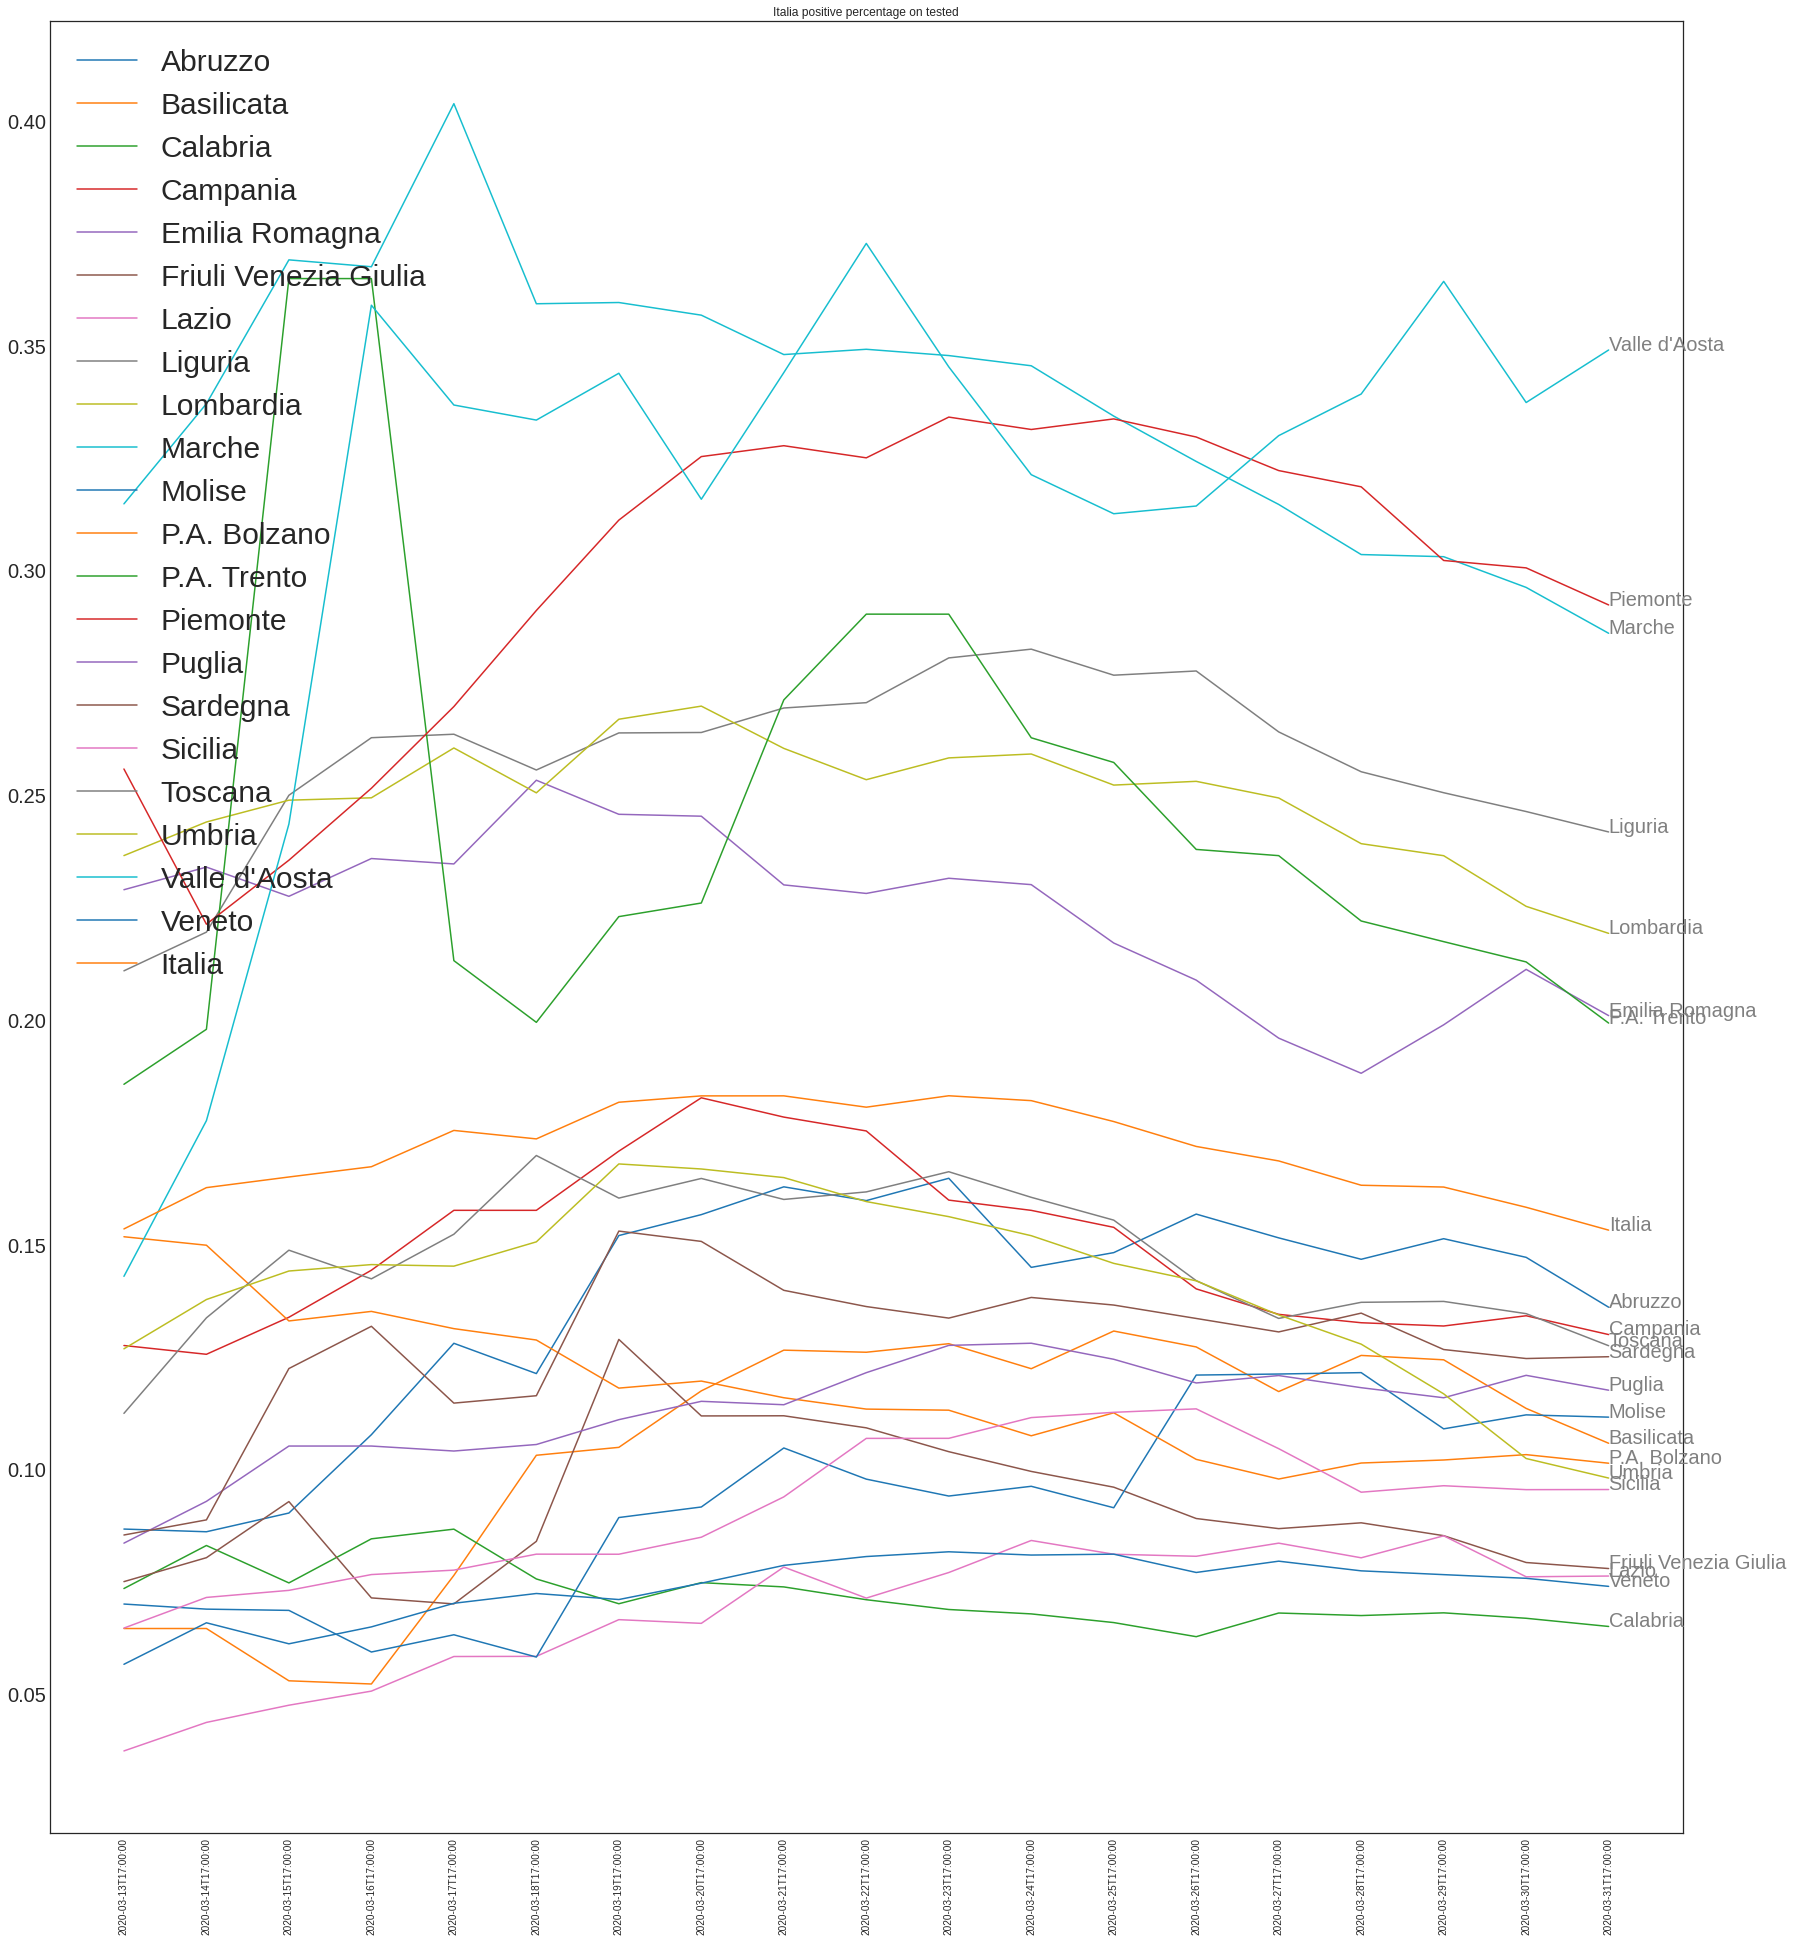

In [113]:
style = dict(size=20, color='gray')
columns = list(italy_tested)
last_day = covid['date'].max()
f = plt.figure(figsize=(60,80))
f.subplots_adjust(hspace=0.4, wspace=0.05)
ax = f.add_subplot(2, 2, 1)
for region in columns: 
    region_positive_vs_tested = italy_currently_positive[[region]]/italy_tested[[region]]
    region_positive_vs_tested = region_positive_vs_tested[18:]
    ax.plot(region_positive_vs_tested.index, region_positive_vs_tested, label=region)
    ax.text(18, region_positive_vs_tested.loc[last_day], region, **style)

ax.set_title(region + ' positive percentage on tested')
ax.set_xticklabels(region_positive_vs_tested.index,rotation=90)
ax.yaxis.set_tick_params(labelsize=20)
ax.set_yscale('linear')
plt.legend(loc="upper left", prop={'size': 30})

Considerando quindi il numero di test eseguiti il picco sembra stato superato il 24/3

In [114]:
italy_tested['Liguria'].diff()

date
2020-02-24T18:00:00      NaN
2020-02-25T18:00:00     38.0
2020-02-26T18:00:00     27.0
2020-02-27T18:00:00     12.0
2020-02-28T18:00:00     34.0
2020-02-29T17:00:00      9.0
2020-03-01T17:00:00      0.0
2020-03-02T18:00:00      0.0
2020-03-03T18:00:00      0.0
2020-03-04T17:00:00     12.0
2020-03-05T17:00:00     13.0
2020-03-06T17:00:00     83.0
2020-03-07T18:00:00    102.0
2020-03-08T18:00:00     70.0
2020-03-09T18:00:00    210.0
2020-03-10T18:00:00     83.0
2020-03-11T17:00:00    331.0
2020-03-12T17:00:00    149.0
2020-03-13T17:00:00    268.0
2020-03-14T17:00:00    308.0
2020-03-15T17:00:00    223.0
2020-03-16T17:00:00    216.0
2020-03-17T17:00:00    320.0
2020-03-18T17:00:00    403.0
2020-03-19T17:00:00    436.0
2020-03-20T17:00:00    446.0
2020-03-21T17:00:00    510.0
2020-03-22T17:00:00    691.0
2020-03-23T17:00:00    543.0
2020-03-24T17:00:00    454.0
2020-03-25T17:00:00    610.0
2020-03-26T17:00:00    702.0
2020-03-27T17:00:00    500.0
2020-03-28T17:00:00    373.0
2020-03-2

In [115]:
italy_new_positive['Liguria']

date
2020-02-24T18:00:00      0
2020-02-25T18:00:00      1
2020-02-26T18:00:00     10
2020-02-27T18:00:00      8
2020-02-28T18:00:00      0
2020-02-29T17:00:00     23
2020-03-01T17:00:00    -17
2020-03-02T18:00:00     -3
2020-03-03T18:00:00      2
2020-03-04T17:00:00      2
2020-03-05T17:00:00      2
2020-03-06T17:00:00      4
2020-03-07T18:00:00     19
2020-03-08T18:00:00     27
2020-03-09T18:00:00     31
2020-03-10T18:00:00     32
2020-03-11T17:00:00     53
2020-03-12T17:00:00     80
2020-03-13T17:00:00     71
2020-03-14T17:00:00    118
2020-03-15T17:00:00     96
2020-03-16T17:00:00    108
2020-03-17T17:00:00    111
2020-03-18T17:00:00    109
2020-03-19T17:00:00    172
2020-03-20T17:00:00    162
2020-03-21T17:00:00    215
2020-03-22T17:00:00    229
2020-03-23T17:00:00    259
2020-03-24T17:00:00    192
2020-03-25T17:00:00    189
2020-03-26T17:00:00    262
2020-03-27T17:00:00    129
2020-03-28T17:00:00    126
2020-03-29T17:00:00    254
2020-03-30T17:00:00    141
2020-03-31T17:00:00    

posx and posy should be finite values
posx and posy should be finite values


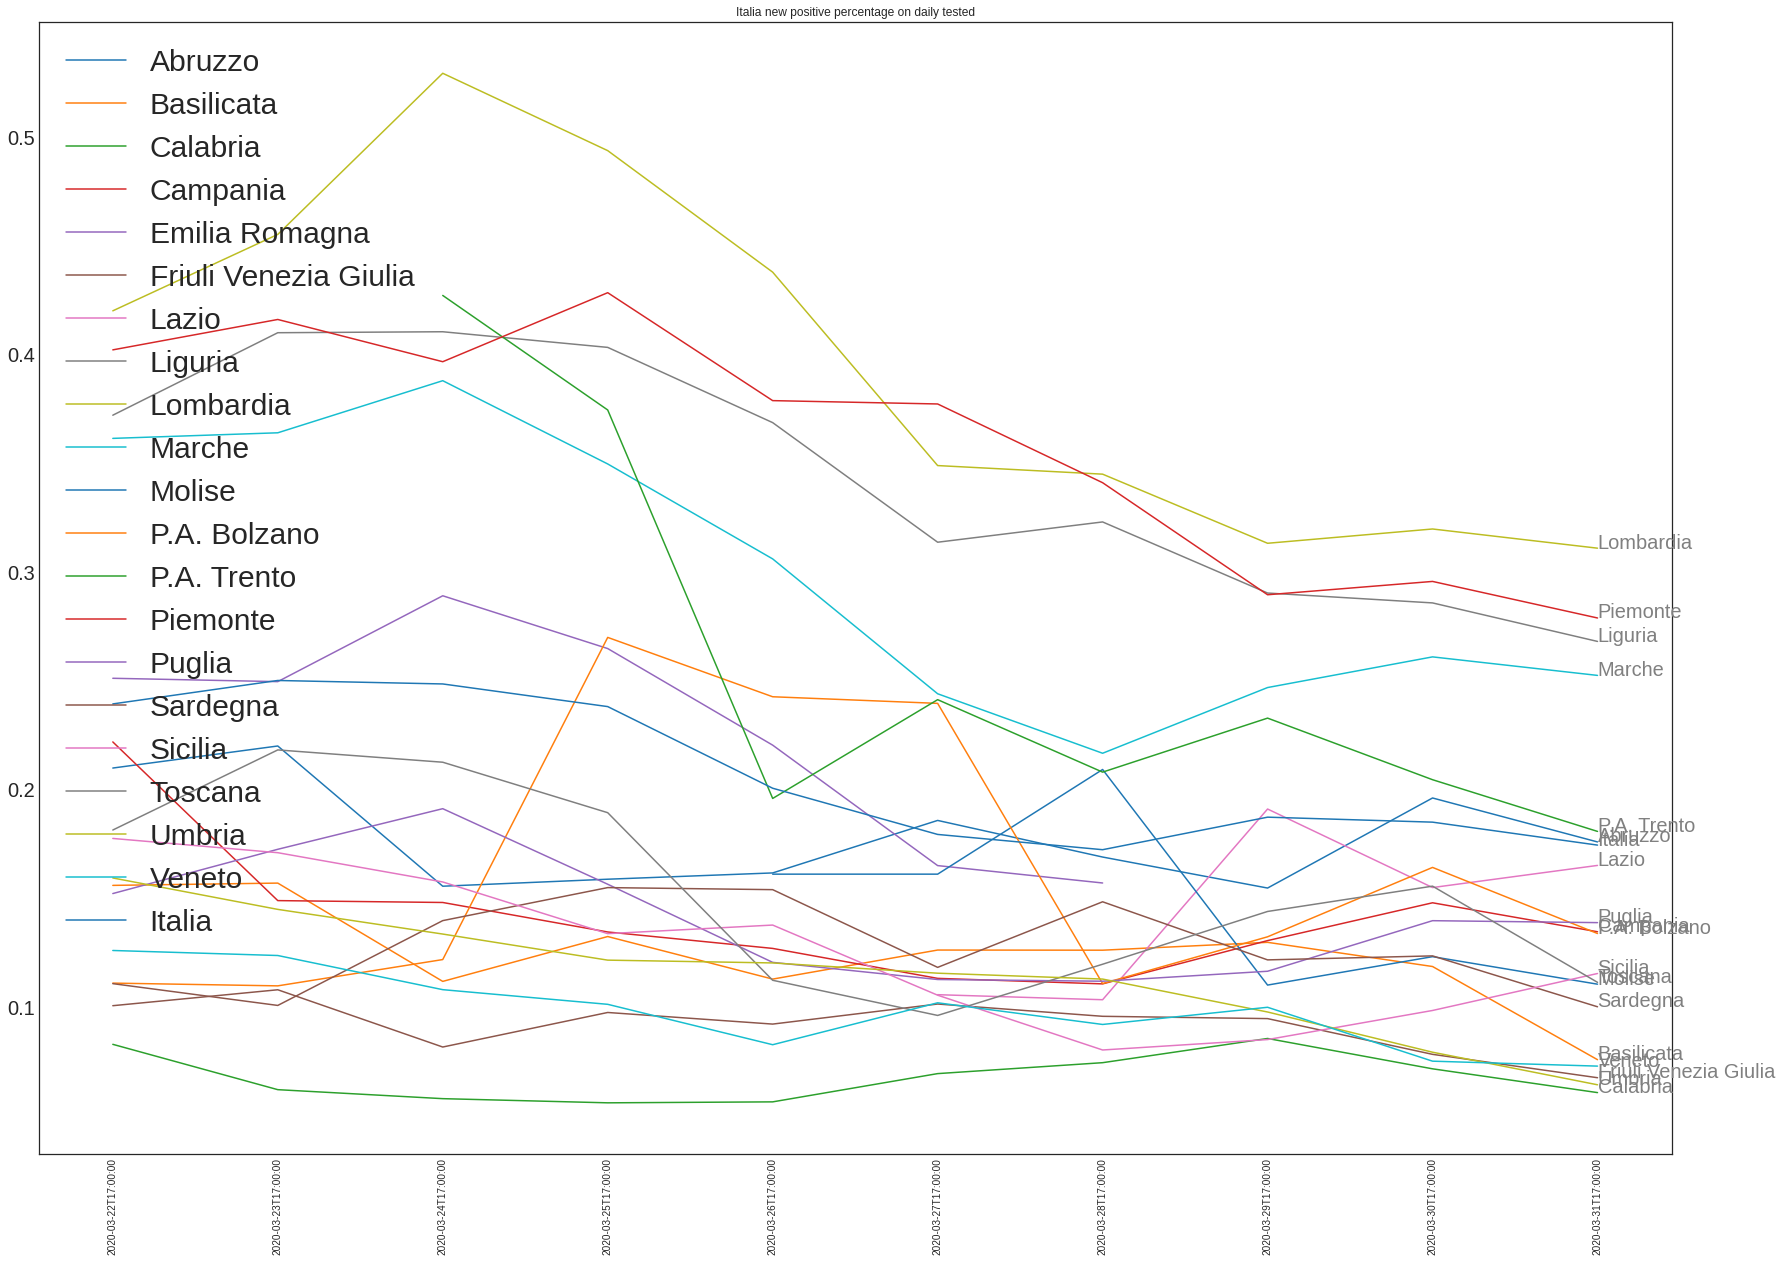

In [116]:
style = dict(size=20, color='gray')
columns = list(italy_tested)
last_day = covid['date'].max()
f = plt.figure(figsize=(60,50))
f.subplots_adjust(hspace=0.4, wspace=0.05)
ax = f.add_subplot(2, 2, 1)
for region in columns: 
  if (region!='Valle d\'Aosta'):
        region_positive_vs_tested = italy_new_positive[[region]]/italy_tested[[region]].diff()
        region_positive_vs_tested = region_positive_vs_tested[25:]
        ax.plot(region_positive_vs_tested.index, region_positive_vs_tested.rolling(window=3).mean(), label=region)
        ax.text(11, region_positive_vs_tested.rolling(window=3).mean().loc[last_day], region, **style)

ax.set_title(region + ' new positive percentage on daily tested')
ax.set_xticklabels(region_positive_vs_tested.index,rotation=90)
ax.yaxis.set_tick_params(labelsize=20)
ax.set_yscale('linear')
plt.legend(loc="upper left", prop={'size': 30})

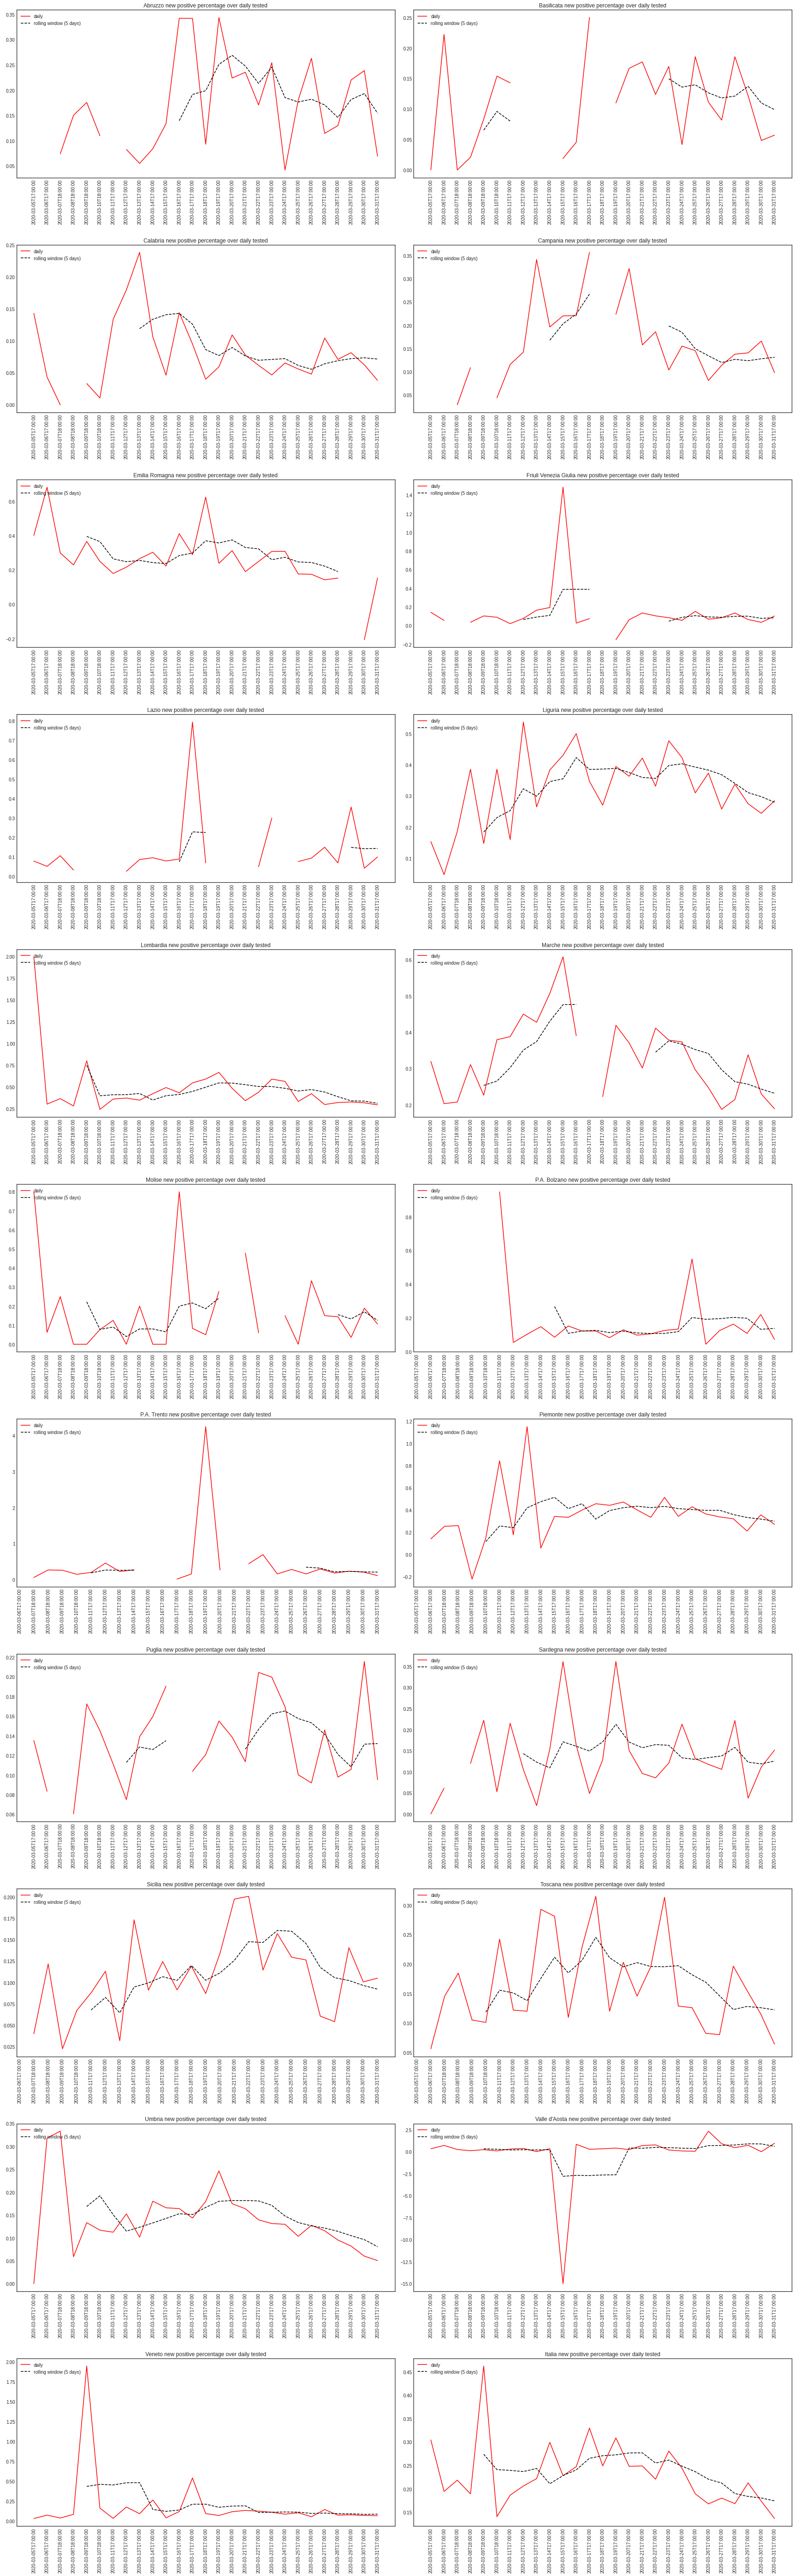

In [117]:
columns = list(italy_tested)
i=1
f = plt.figure(figsize=(30,100))
f.subplots_adjust(hspace=0.4, wspace=0.05)
for region in columns: 
    ax = f.add_subplot(11, 2, i)
    region_new_positive_vs_tested = italy_new_positive[[region]]/italy_tested[[region]].diff()
    region_new_positive_vs_tested.columns = ['Positive_perc']
    region_new_positive_vs_tested = region_new_positive_vs_tested[10:]
    ax.plot(region_new_positive_vs_tested.index, region_new_positive_vs_tested['Positive_perc'], '-r', label='daily')
    ax.plot(region_new_positive_vs_tested.index, region_new_positive_vs_tested['Positive_perc'].rolling(window=5).mean(), '--k', label='rolling window (5 days)')
    ax.set_title(region + ' new positive percentage over daily tested')
    ax.set_xticklabels(region_new_positive_vs_tested.index,rotation=90)
    ax.legend(loc='upper left', frameon=False)
    i=i+1


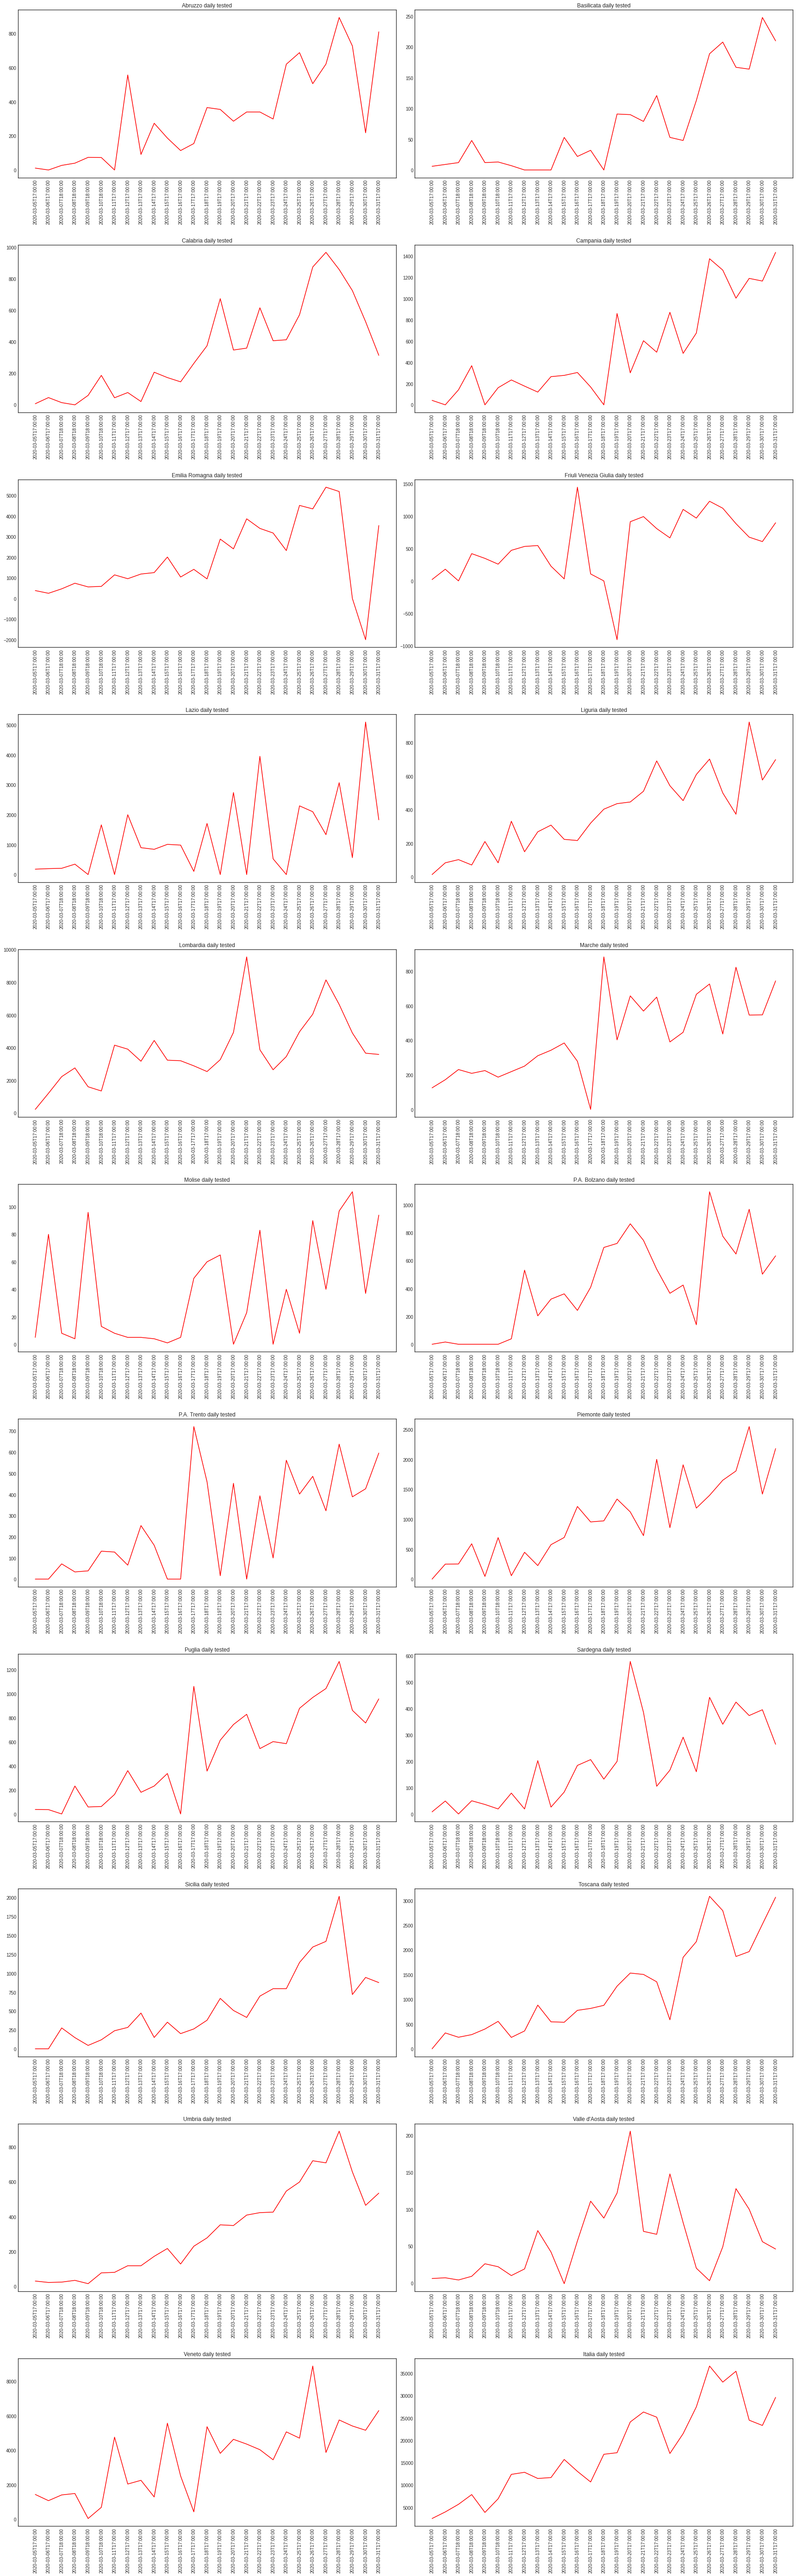

In [118]:
columns = list(italy_tested)
i=1
f = plt.figure(figsize=(30,100))
f.subplots_adjust(hspace=0.4, wspace=0.05)
for region in columns: 
    ax = f.add_subplot(11, 2, i)
    region_daily_tested = italy_tested[[region]].diff()
    region_daily_tested.columns = ['tested']
    region_daily_tested = region_daily_tested[10:]
    ax.plot(region_daily_tested.index, region_daily_tested['tested'], '-r', label='daily')
    ax.set_title(region + ' daily tested')
    ax.set_xticklabels(region_new_positive_vs_tested.index,rotation=90)
    i=i+1


Quindi si può vedere che l'aumento del numero di test è stato determinante nel far salire il numero di contagi registrati, in realtà da giorni il rapporto tra nuovi positivi e test giornalieri sta scendendo gradualmente. A livello nazionale il picco può essere identificato nel 21/3